In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_momentum_fakedata/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_momentum_fake_data.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_fakedata_Set2_3b_crtcorr.root'
filename_ext = 'NuCCana_ext_V25_G1.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_fakedata = NuCC.getPOT(inputdir,filename_data,tree_name)
pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files

print pot_fakedata
pot_data =    7.644e+18  # best with tor875
pot_data = pot_fakedata
pot_data_draw = 3.54e+20
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  85768579.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	385260
Ext: Number of Entries:		1018743
Dirt: Number of Entries:	40808

3.74172061024e+20
POT: 
Data:		3.74172061024e+20
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0214379207565
Overlay:	0.301689790073
Dirt:		2.99290494589


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	989714
Data: Number of Entries:	385259
Ext: Number of Entries:		1018742
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 2.76101e+11  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
#energy_cut = ' && MCle_Energy>0.15'
    
#numu_signal = numu_signal+energy_cut
#numu_true = numu_true+energy_cut

num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
#N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
#N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries('numu_true')*scale_out[overlay_out]

print N_overlay

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
#globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
#dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

overlay_out.Draw(weight_name+'>>h_weight_func','numu_true','0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()

print overlay_pass_weight

#N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight
eff = N_signal/N_true

sigma_tot = (N_data- (N_overlay))/(eff*beam_flux*N_tot)
print 'Number of data:', N_data
#print 'Number of ext:', N_ext
#print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Efficiency: ',eff
print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

8764.39009142
1.11470866893
Number of data: 65098
Number of overlay: 9769.7416128
Number of overlay signal: 47735.6695216
Efficiency:  0.525802793429
Total integrated cross section: 9.28799694385e-39
Total integrated cross section for MC: 8.01342325881e-39


In [14]:
target_nucl_fd = 4.10331109202e+31
flux_fd = 3.54124623456e+20*7.3789785277e-10
print flux_fd

print beam_flux
print N_tot

2.61307799261e+11
2.76100760396e+11
4.10331109202e+31


In [15]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/momentum_bins',mom_bins)
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [16]:
x = np.load('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/momentum_bins.npy')
print x

[0.   0.18 0.3  0.45 0.77 1.28 2.5 ]


In [17]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data_draw)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

def draw_adding_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/19.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data_draw)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/19.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim_ratio():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/19.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [18]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


[0.07935011 0.38332173 0.48265615 0.57605541 0.67807549 0.69709468]


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_trueMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_eff_trueMom.pdf has been created


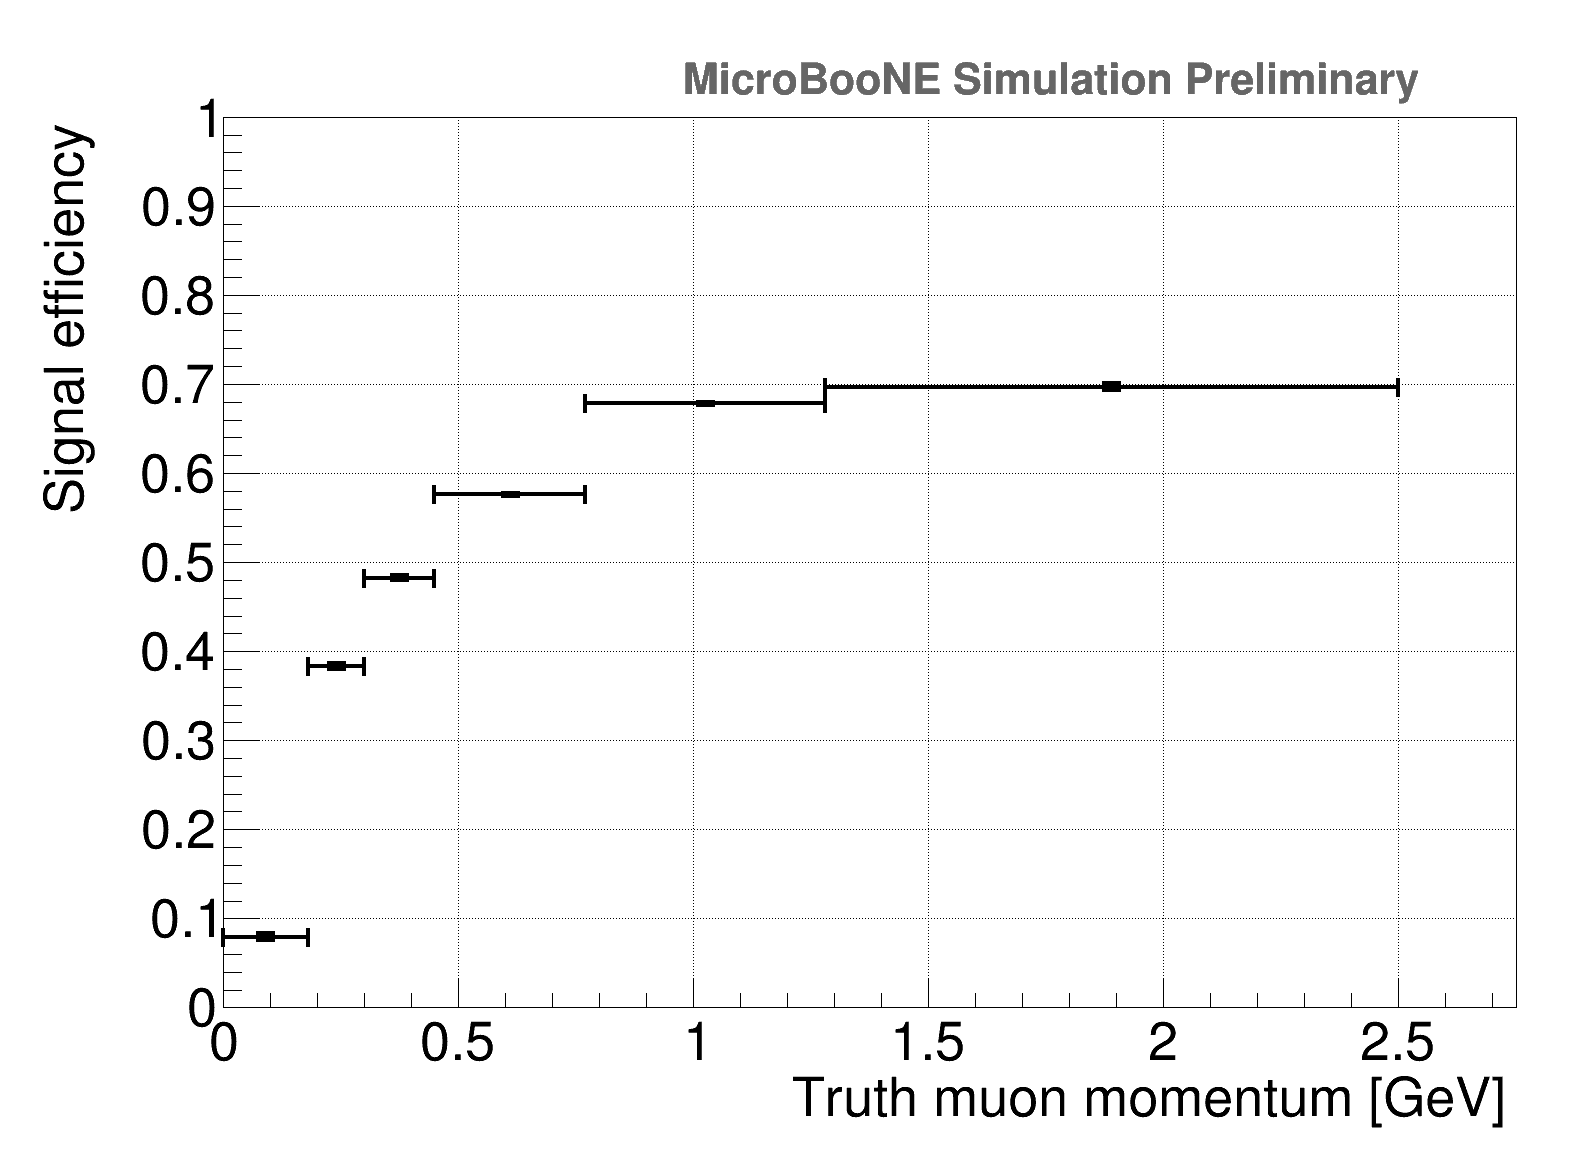

In [19]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueMom.pdf")

eff.Write("h_eff_true")
true_eff_arr = np.zeros((binnum))
h_eff_tmp = h_init_eff_energy.Clone()
h_eff_tmp.Divide(h_init_eff_energy_1)
for i in range(1,binnum+1):
    true_eff_arr[i-1] = h_eff_tmp.GetBinContent(i)
print true_eff_arr
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/true_efficiency_momentum',true_eff_arr)

In [20]:
N_sig = h_init_eff_energy.Integral(0,binnum+1)
N_true = h_init_eff_energy_1.Integral(0,binnum+1)
print N_sig/N_true,N_sig,N_true

0.525798802921 158228.574585 300929.887451


185666

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_MCS.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_MCS.pdf has been created


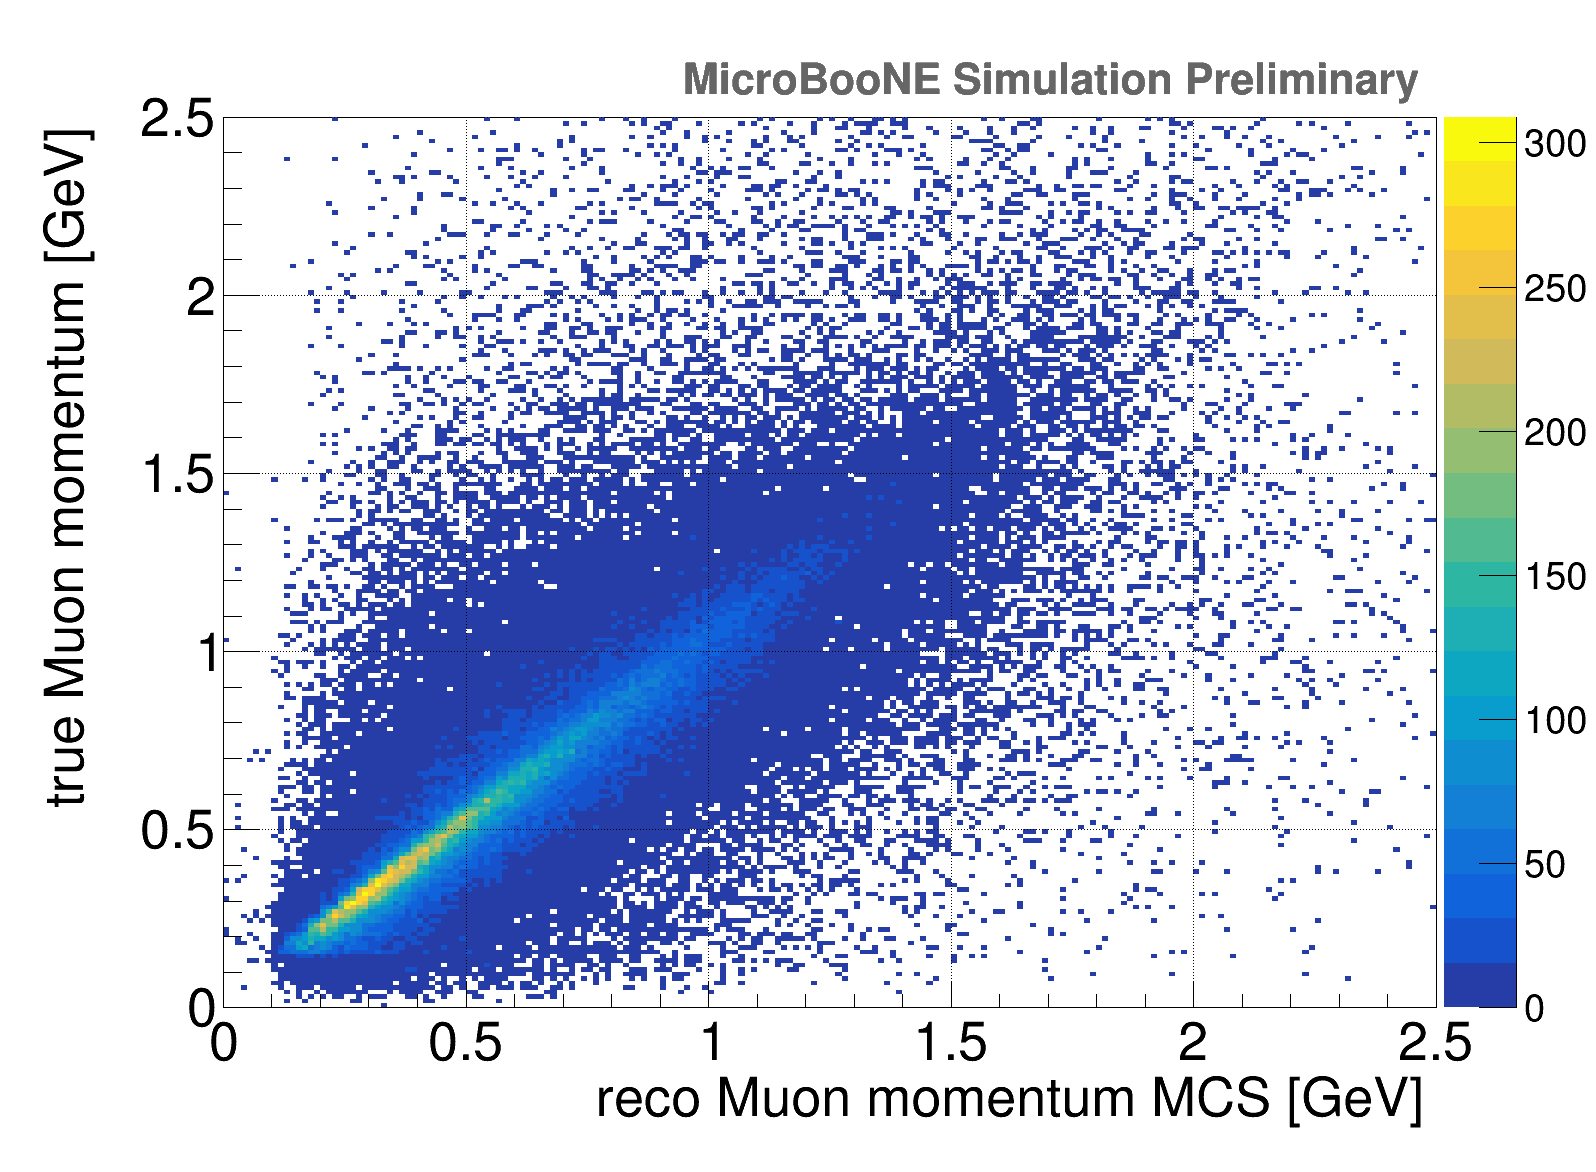

In [21]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.1)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS.pdf")
h_migration.Write("h2_true_MCS_fine")

1239

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_MCS_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_MCS_bin.pdf has been created


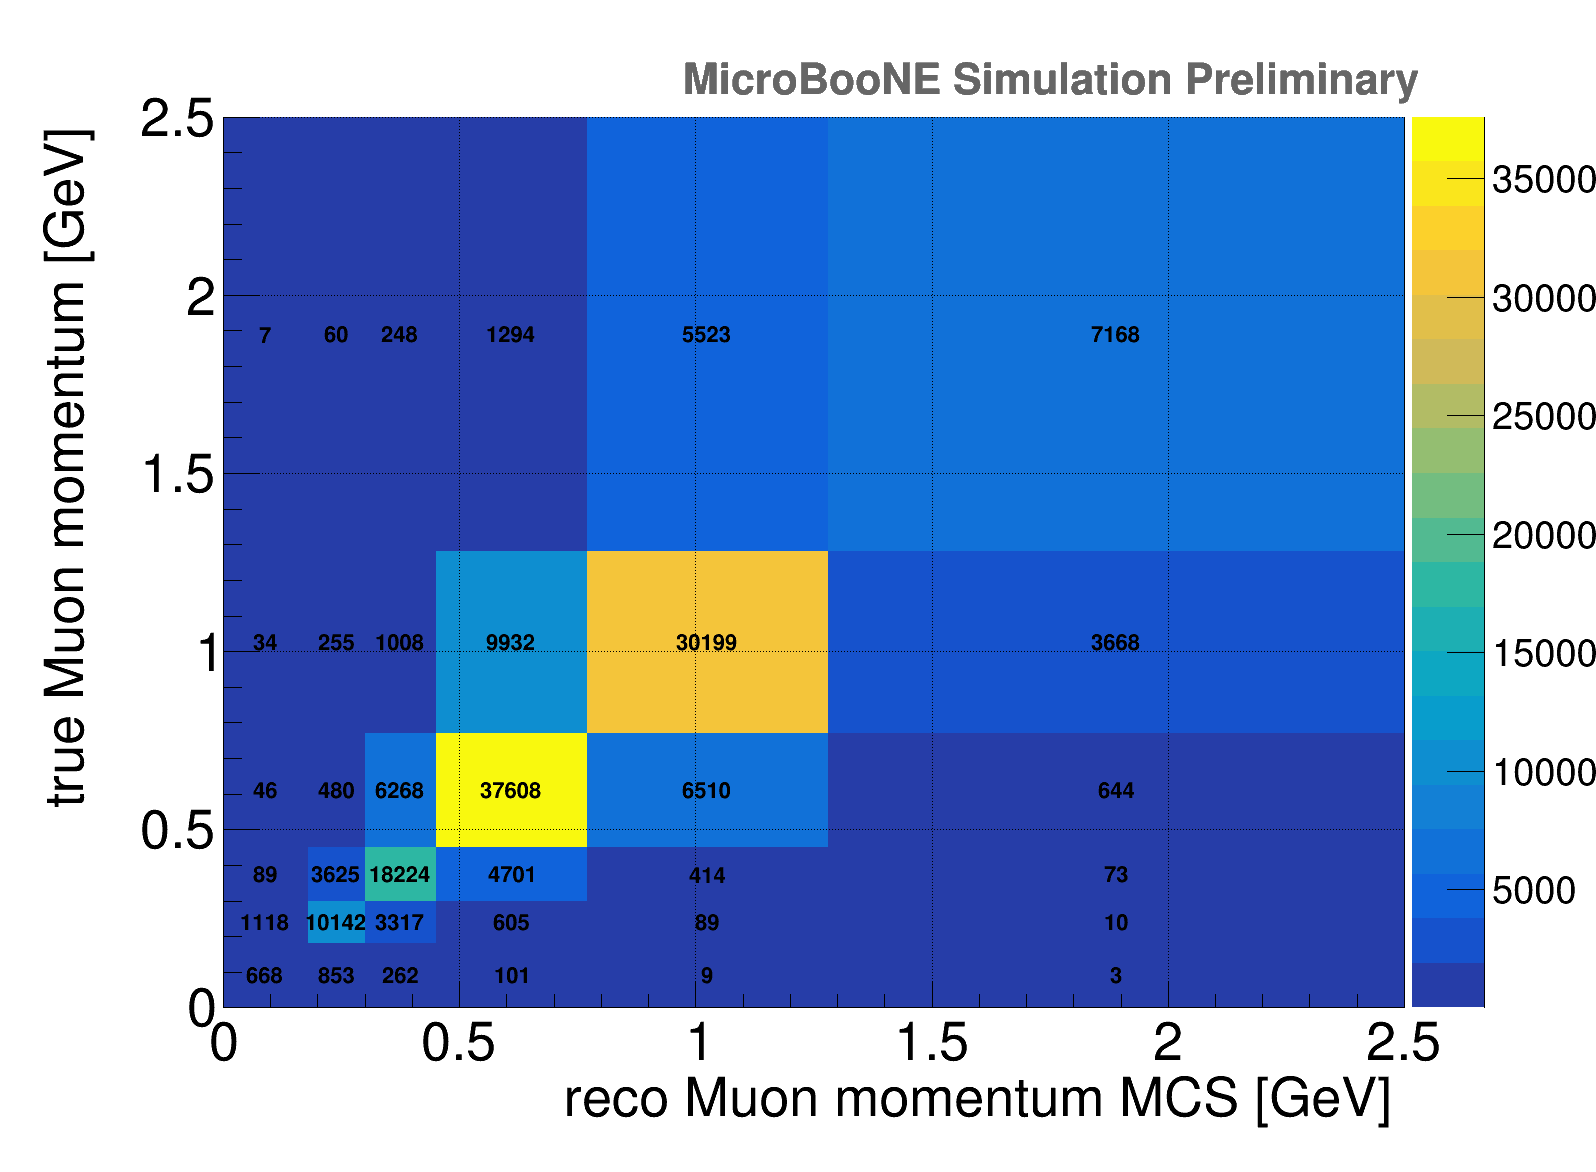

In [22]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.0f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

[[3.52180656e-01 7.31538623e-02 3.27025282e-03 8.99052064e-04
  7.56072767e-04 4.81619461e-04 0.00000000e+00]
 [4.49429357e-01 6.63660976e-01 1.33502005e-01 9.28948766e-03
  5.62373238e-03 4.13720769e-03 2.98093369e-03]
 [1.38347454e-01 2.17059245e-01 6.71235849e-01 1.21378335e-01
  2.22639183e-02 1.70876627e-02 1.83081425e-02]
 [5.33632110e-02 3.96170416e-02 1.73163504e-01 7.28232380e-01
  2.19422428e-01 8.92776389e-02 8.81612808e-02]
 [4.80569202e-03 5.81173134e-03 1.52382235e-02 1.26062475e-01
  6.67155728e-01 3.81083698e-01 2.31434575e-01]
 [1.34644997e-03 6.31704857e-04 2.68004808e-03 1.24613304e-02
  8.10338863e-02 4.94636372e-01 5.69600561e-01]
 [5.27179558e-04 6.54387589e-05 9.10117542e-04 1.67694054e-03
  3.74423420e-03 1.32958015e-02 8.95145065e-02]]


676

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_mitigation_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_mitigation_matrix.pdf has been created


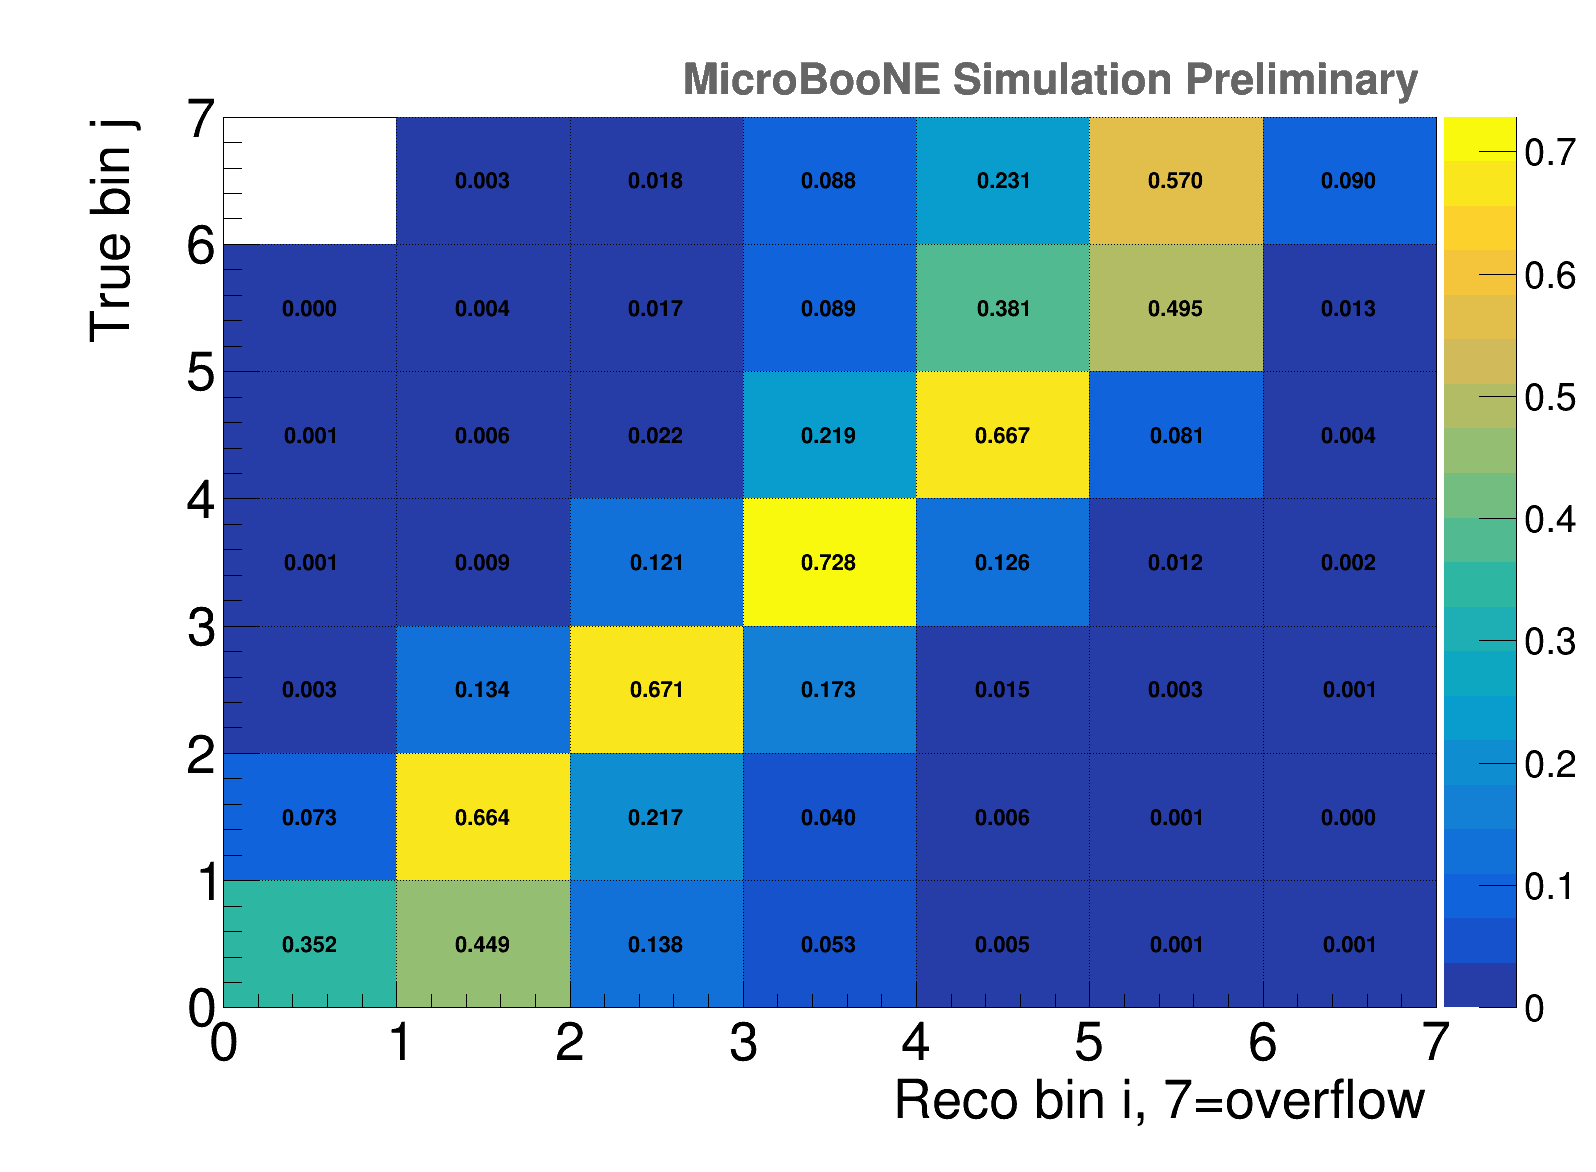

In [23]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0]
mitigation_matrix = np.zeros((7,7))
for j in range(1,binnum+2):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,7,0,7)
for j in range(1,binnum+2):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
#mitigation_matrix = mitigation_matrix.transpose()
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [24]:
#print h_mitigation_matrix
h_test_true = [1,0,0,0,0,0,0]
h_test_reco = mitigation_matrix.dot(h_test_true)
print h_test_reco

[0.35218066 0.44942936 0.13834745 0.05336321 0.00480569 0.00134645
 0.00052718]


In [25]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

487

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


300929.887451
300186.732178
158228.574585
158939.173218
0.525798802921
0.529467681882


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_pass_smearing.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_pass_smearing.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_pass_smearing.pdf has been created


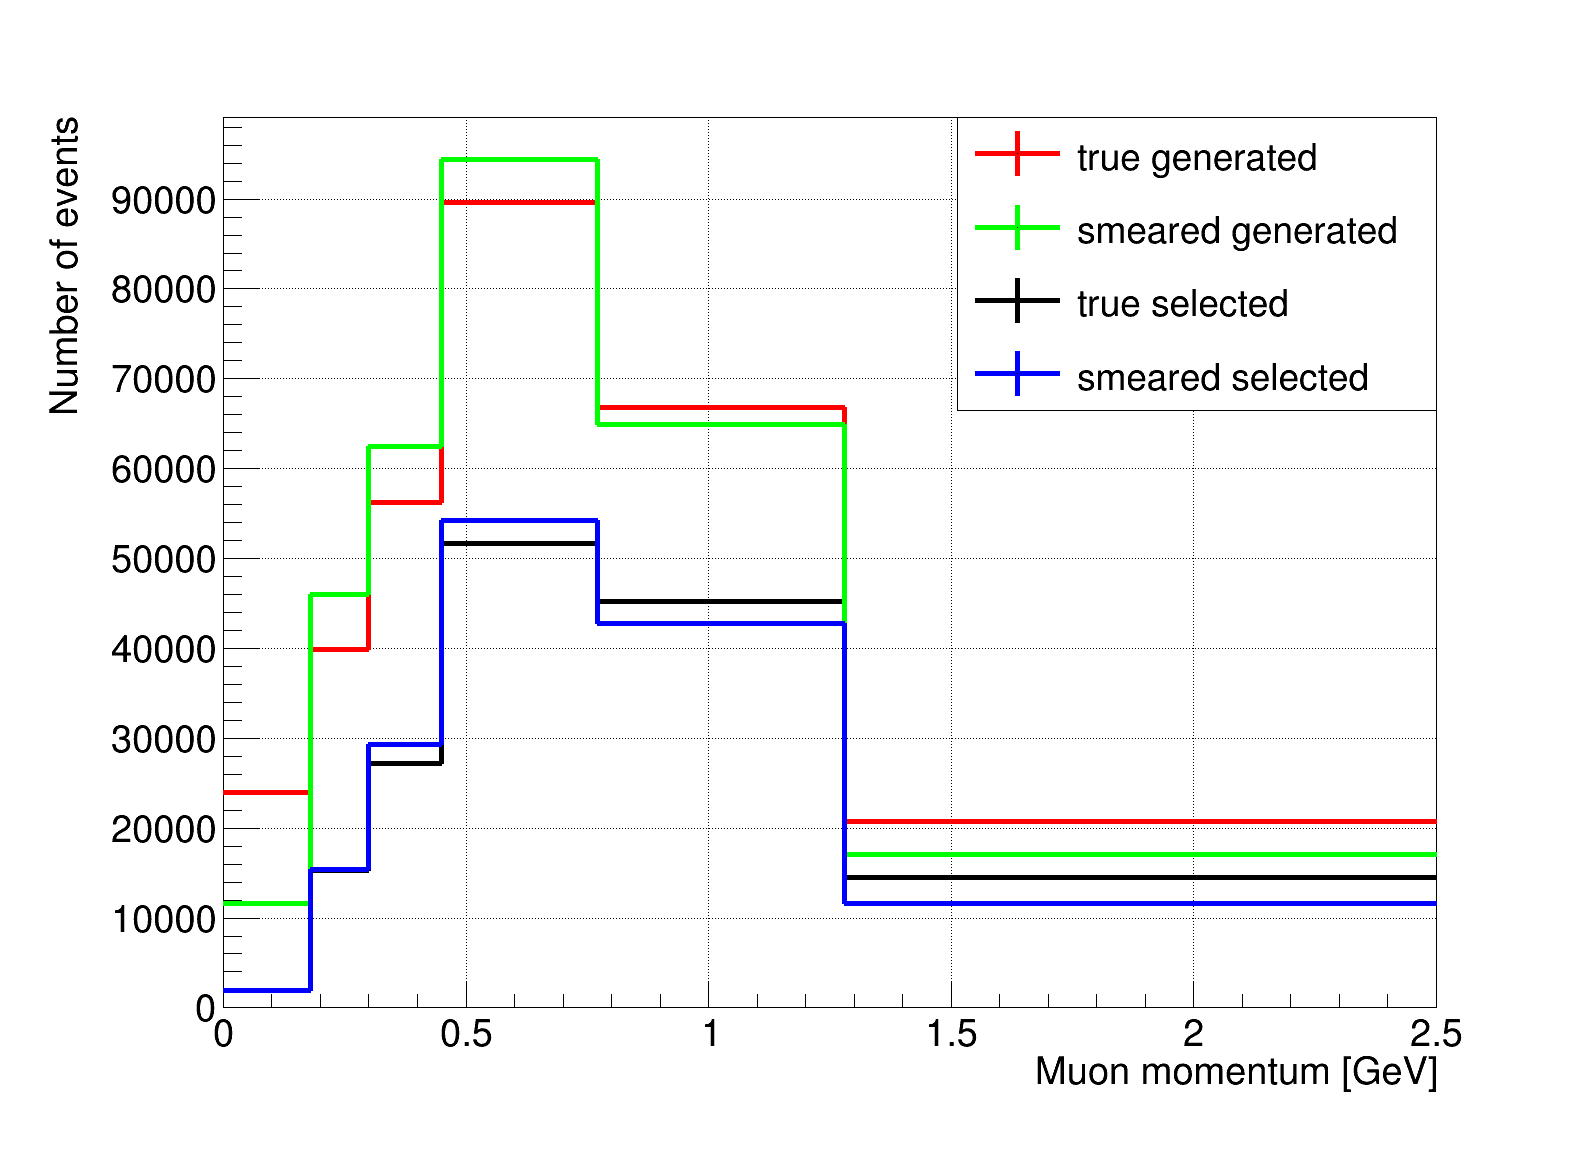

In [26]:
h_init_eff_energy_1.SetLineWidth(5)
h_init_eff_energy_1.SetLineColor(ROOT.kRed)
h_init_eff_energy_1.SetMinimum(0)
h_init_eff_energy.SetLineWidth(5)
h_init_eff_energy.SetLineColor(ROOT.kBlack)


gen_smeared = np.zeros((7))
sel_smeared = np.zeros((7))
for i in range(1,binnum+1):
    gen_smeared[i-1] = h_init_eff_energy_1.GetBinContent(i)
    sel_smeared[i-1] = h_init_eff_energy.GetBinContent(i)
gen_smeared = mitigation_matrix.dot(gen_smeared)
sel_smeared = mitigation_matrix.dot(sel_smeared)

h_init_eff_energy_1_sm = h_init_eff_energy_1.Clone()
h_init_eff_energy_sm = h_init_eff_energy_1.Clone()

for i in range(1,binnum+1):
    h_init_eff_energy_1_sm.SetBinContent(i,gen_smeared[i-1])
    h_init_eff_energy_sm.SetBinContent(i,sel_smeared[i-1])
    
h_init_eff_energy_1_sm.SetLineWidth(5)
h_init_eff_energy_1_sm.SetLineColor(ROOT.kGreen)
h_init_eff_energy_1_sm.SetMinimum(0)
h_init_eff_energy_sm.SetLineWidth(5)
h_init_eff_energy_sm.SetLineColor(ROOT.kBlue)

legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend.AddEntry(h_init_eff_energy_1,'true generated',"lep");
legend.AddEntry(h_init_eff_energy_1_sm,'smeared generated',"lep");
legend.AddEntry(h_init_eff_energy,'true selected',"lep");
legend.AddEntry(h_init_eff_energy_sm,'smeared selected',"lep");

h_init_eff_energy_1_sm.SetXTitle("Muon momentum [GeV]")
h_init_eff_energy_1_sm.SetYTitle("Number of events")

h_init_eff_energy_1_sm.Draw('hist')

h_init_eff_energy_1.Draw('same hist')
h_init_eff_energy.Draw('same hist')
h_init_eff_energy_1_sm.Draw('same hist')
h_init_eff_energy_sm.Draw('same hist')
legend.Draw()

print h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_1_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)/h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)/h_init_eff_energy_1_sm.Integral(0,binnum+2)

c1.Draw()

c1.SaveAs(globale.outputdir_png + "h_pass_smearing.png")
c1.SaveAs(globale.outputdir_root + "h_pass_smearing.root")
c1.SaveAs(globale.outputdir_pdf + "h_pass_smearing.pdf")

In [27]:
# e tilde
N_sel = np.zeros((7))
N_gen = np.zeros((7))
for i in range(1,binnum+2):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/eff_tilde_momentum',eff_tilde)
print output_filedir

1897.8870849609375 23917.890625 0.07935010301356529
15284.4296875 39873.6328125 0.3833217243929798
27156.919921875 56265.5625 0.4826561526311054
51645.1171875 89653.0390625 0.5760553989864922
45269.43359375 66761.640625 0.6780755111760707
14492.2001953125 20789.4296875 0.6970946492113819
2482.5869140625 3668.692138671875 0.6766953508836083
[0.16827187 0.33509144 0.4698891  0.57503418 0.65819969 0.67925527
 0.651143  ]
/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/


In [28]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

2.88574153185


461

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_tilde_xsecMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_eff_tilde_xsecMom.pdf has been created


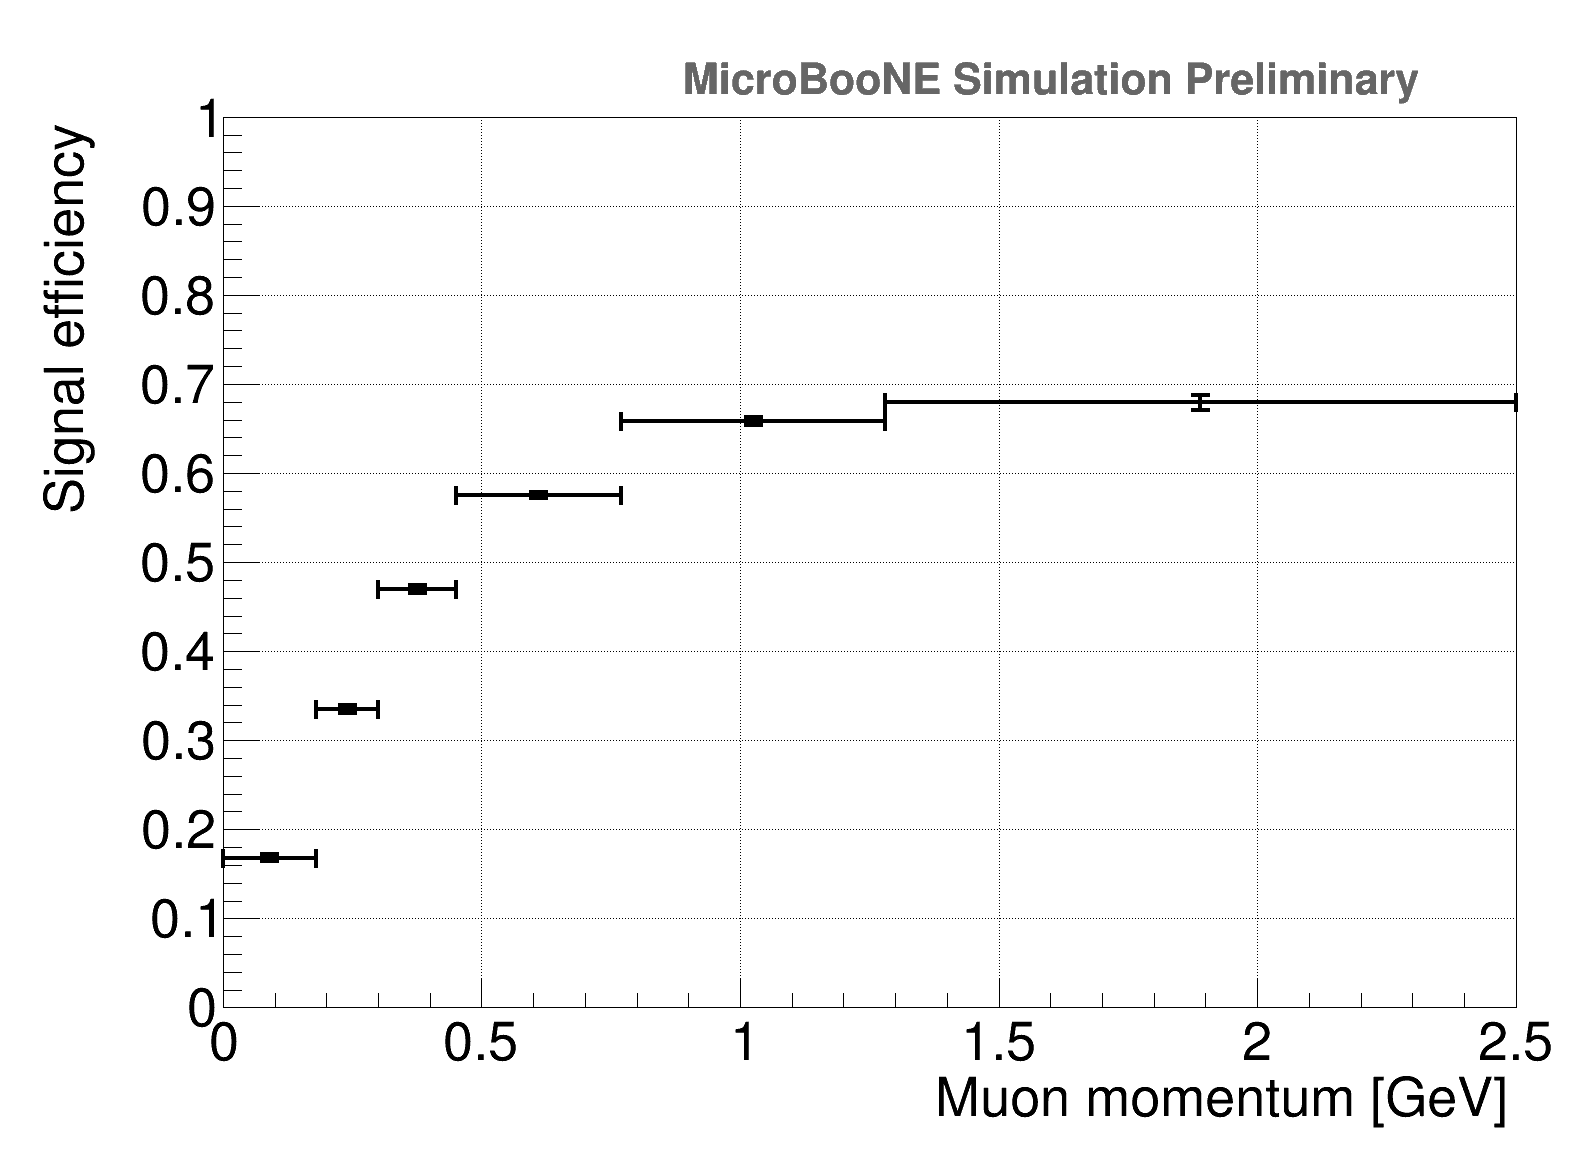

In [29]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecMom.pdf")
print h_eff_tilde.Integral(0,binnum+2)
h_eff_tilde.Write("h_eff_tilde")

In [30]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
#h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))
h_mctrue = ROOT.TH1F("h_mctrue",'h_mctrue',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
#globale.ext_out.Draw(variable+'>>h_ext',cut,'')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')
#globale.overlay_out.Draw(variable+'>>h_mctrue',weight_name+'*( numu_true)','')

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true)','')

246811L

In [31]:
from uncertainties import ufloat
from uncertainties.umath import *  

In [32]:
#lat = np.zeros(8,binnum)
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    n_da = h_data.GetBinContent(i)
    err_da = math.sqrt(n_da)
    #n_ext = h_ext.GetBinContent(i)
    #err_ext = math.sqrt(n_ext)
    #n_dirt = h_dirt.GetBinContent(i)
    #err_dirt = math.sqrt(n_dirt)
    n_ov = h_overlay.GetBinContent(i)
    err_ov = math.sqrt(n_ov)
    n_sig = h_signal.GetBinContent(i)
    err_sig = math.sqrt(n_sig)
    #print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
    #' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
    #print ''
    print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    
    
    
    #print 'data: {0:0.2f}'.format(n_da*scale[data]), ' +- {0:0.2f}'.format(err_da*scale[data])
    #print ' Ext: {0:0.2f}'.format(n_ext*scale[ext]),' +- {0:0.2f}'.format(err_ext*scale[ext])
    #print' Dirt: {0:0.2f}'.format(n_dirt*scale[dirt]),' +- {0:0.2f}'.format(err_dirt*scale[dirt])
    #print ' Overlay: {0:0.2f}'.format(n_ov*scale[overlay]),' +- {0:0.2f}'.format(err_ov*scale[overlay])
    #print ' Signal: {0:0.2f}'.format(n_sig*scale[overlay]),' +- {0:0.2f}'.format(err_sig*scale[overlay])
    #print 'Total back ground: {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #print 'Total data - background: {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' +- {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #lat[i-1][0]=i
print ''
 

print 'For total cross section'
n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
#n_ext = h_ext.Integral(0,binnum+1)
#err_ext = math.sqrt(n_ext)
#n_dirt = h_dirt.Integral(0,binnum+1)
#err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)

n_true = h_true.Integral(0,binnum+1)
err_true = math.sqrt(n_true)

data_u = ufloat(n_da, err_da)*scale[data]
#ext_u = ufloat(n_ext, err_ext)*scale[ext]
#dirt_u = ufloat(n_dirt, err_dirt)*scale[dirt]
overlay_u = ufloat(n_ov, err_ov)*scale[overlay]
sig_u = ufloat(n_sig, err_sig)*scale[overlay]
true_u = ufloat(n_true, err_true)*scale[overlay]
eff_u = sig_u/true_u

xsec = (data_u - (overlay_u))/(eff_u*beam_flux*N_tot)# 

print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))



1  & 1289.00  $\pm$ 35.90  & 647.47  $\pm$ 13.98  & 592.03  $\pm$ 13.36 2  & 7819.00  $\pm$ 88.43  & 2532.17  $\pm$ 27.64  & 4652.20  $\pm$ 37.46 3  & 13182.00  $\pm$ 114.81  & 2767.38  $\pm$ 28.89  & 8861.47  $\pm$ 51.71 4  & 21281.00  $\pm$ 145.88  & 2356.56  $\pm$ 26.66  & 16430.73  $\pm$ 70.41 5  & 16363.00  $\pm$ 127.92  & 1088.36  $\pm$ 18.12  & 13068.89  $\pm$ 62.79 6  & 4889.00  $\pm$ 69.92  & 336.81  $\pm$ 10.08  & 3915.63  $\pm$ 34.37 
For total cross section
6  & 65098.00  $\pm$ 255.14  & 9769.13  $\pm$ 54.29  & 47735.98  $\pm$ 120.01


In [33]:
xsec

9.28815608737003e-39+/-5.243547307707197e-41

In [34]:
print xsec
print 'Result = {:10.3g}'.format(xsec*1e38)

(9.29+/-0.05)e-39
Result =      0.929+/-     0.005


In [35]:

h_data.Sumw2()
#h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
#h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
#h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

442

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [36]:
data_points = np.zeros((binnum))
mc_bkg_points = np.zeros((binnum))
for i in range(1,binnum+1):
    data_points[i-1] = h_data.GetBinContent(i)
    mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    #mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
print data_points
print mc_bkg_points
#print mc_signal_points
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points_momentum',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_bkg_points_momentum',mc_bkg_points)

[ 1289.  7819. 13182. 21281. 16363.  4889.]
[ 647.47436523 2532.17163086 2767.38110352 2356.55541992 1088.35913086
  336.81091309]


In [37]:
print h_overlay.GetSumOfWeights()
#h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

9728.75256348
55094.2478027


In [38]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy'+'>>h_true',weight_name+'*(numu_true)','')
h_true.Scale(globale.scale[globale.overlay])
h_true.SetLineColor(ROOT.kOrange)
h_true.SetLineWidth(4)

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


In [39]:
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum+1))
for i in range(1,binnum+2):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum+1))
true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

3519.339019579514
13886.409343179495
18862.28071663516
28574.809958795297
19856.598150885755
5764.759448124267


In [40]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_smeare.Scale(1.0/(N_tot*beam_flux*1e-38))

In [41]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    h_true_smeare.SetBinContent(i,h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i))
    h_true_smeare.SetBinError(i,h_true_smeare.GetBinError(i)/h_true_smeare.GetBinWidth(i))

    print h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i)

0.958769068105
8.51187771512
7.39962615961
2.46309624902
0.673848812231
0.0341868783407


In [42]:
mc_signal_points = np.zeros((binnum))

for i in range(1,binnum+1):
    #data_points[i-1] = h_data.GetBinContent(i)
    #mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
#print data_points
#print mc_bkg_points
print mc_signal_points
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_signal_points_momentum',mc_signal_points)

[0.17252602 1.02120197 1.10972965 0.78815401 0.34364408 0.04170682]


In [43]:
'''legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(h_data.GetMaximum()*1.2)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted.pdf")

h_data.Write("h_data_bkgsubtracted")
h_overlay_sig.Write("h_MC_bkgsubtracted")'''

'legend = ROOT.TLegend(0.6,0.65,0.9,0.9)\nh_overlay_sig.SetLineColor(2)\nlegend.AddEntry(h_data,\'data\',"lep");\nlegend.AddEntry(h_overlay_sig,\'MC\',"f");\nh_data.SetYTitle("Selected Events - background")\nh_data.SetXTitle("p_{\\mu} \t [GeV]")\nh_data.SetLineWidth(3)\nh_data.SetMaximum(h_data.GetMaximum()*1.2)\n\nh_data.GetYaxis().SetTitleSize(0.05)\nh_data.GetYaxis().SetTitleOffset(0.0)\nh_data.GetYaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleSize(0.05)\nh_data.GetXaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleOffset(1)\nh_data.SetLineColor(ROOT.kBlack)\nh_data.SetLineWidth(4)\nROOT.gStyle.SetEndErrorSize(9)\nc1.SetRightMargin(0.05)\n\nh_data.Draw(\'E1\')\nh_overlay_sig.SetFillColor(0)\nh_overlay_sig.SetLineWidth(4)\n#h_overlay_sig.Draw(\'hist same\')\nh_overlay_sig.DrawCopy(\'Hist same\')\nh_overlay_sig.SetFillColor(2)\nh_overlay_sig.SetFillStyle(3001)\nh_overlay_sig.Draw(\'E2 same\')\nh_true.Draw(\'hist same\')\nlegend.Draw()\nprelim, pot_tex = draw_adding()\nprelim

In [44]:
'''for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))

    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)'''

'for i in range(1,binnum+1):\n    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))\n    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))\n    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))\n\n    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))\n    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))\n    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))\n    \n    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)'

In [45]:
'''legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
#h_data.SetMaximum(h_data.GetMaximum()*1.2)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted_binwidth.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted_binwidth.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_bkgsubtracted_binwidth")'''

'legend = ROOT.TLegend(0.6,0.65,0.9,0.9)\nh_overlay_sig.SetLineColor(2)\nlegend.AddEntry(h_data,\'data\',"lep");\nlegend.AddEntry(h_overlay_sig,\'MC\',"f");\nh_data.SetYTitle("Selected Events - background")\nh_data.SetXTitle("p_{\\mu} \t [GeV]")\nh_data.SetLineWidth(3)\n#h_data.SetMaximum(h_data.GetMaximum()*1.2)\n\nh_data.GetYaxis().SetTitleSize(0.05)\nh_data.GetYaxis().SetTitleOffset(0.0)\nh_data.GetYaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleSize(0.05)\nh_data.GetXaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleOffset(1)\nh_data.SetLineColor(ROOT.kBlack)\nh_data.SetLineWidth(4)\nROOT.gStyle.SetEndErrorSize(9)\nc1.SetRightMargin(0.05)\n\nh_data.Draw(\'E1\')\nh_overlay_sig.SetFillColor(0)\nh_overlay_sig.SetLineWidth(4)\n#h_overlay_sig.Draw(\'hist same\')\nh_overlay_sig.DrawCopy(\'Hist same\')\nh_overlay_sig.SetFillColor(2)\nh_overlay_sig.SetFillStyle(3001)\nh_overlay_sig.Draw(\'E2 same\')\nh_true.Draw(\'hist same\')\n\nlegend.Draw()\nprelim, pot_tex = draw_adding()\npre

In [46]:
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)

0.186951056123 0.0122748487244
1.1605091095 0.0259663277323
1.30423176289 0.018792558921
0.907773435116 0.00906091701703
0.401643872261 0.00436893867462
0.048487007618 0.000951331804946


In [47]:
'''h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))'''

'h_data.Divide(h_eff_tilde)\nh_data.Scale(1.0/(N_tot*beam_flux*1e-38))'

In [48]:
'''for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)'''

"for i in range(1,binnum+1):\n    #print 'Entries in bin ',i,'-------------------------------------------------------------'\n    print h_data.GetBinContent(i),h_data.GetBinError(i)"

In [49]:
'''h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))'''

'h_overlay_sig.Divide(h_eff_tilde)\nh_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))'

In [50]:
'''h_true.Scale(1.0/(N_tot*beam_flux*1e-38))'''

'h_true.Scale(1.0/(N_tot*beam_flux*1e-38))'

In [51]:
'''h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum+1))
for i in range(1,binnum+2):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum+1))

true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)'''

'h_true_smeare = h_true.Clone()\ntrue_bins = np.zeros((binnum+1))\nfor i in range(1,binnum+2):\n    true_bins[i-1] = h_true.GetBinContent(i)\n    \ntrue_bins_smeared = np.zeros((binnum+1))\n\ntrue_bins_smeared = mitigation_matrix.dot(true_bins)\n\nfor i in range(1,binnum+1):\n    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])\n    print true_bins_smeared[i-1]\nh_true_smeare.SetLineColor(ROOT.kGreen)\nh_true_smeare.SetLineWidth(4)'

In [52]:
check_wes = 0.0
for i in range(1,binnum+2):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)
    check_wes = check_wes+h_data.GetBinContent(i)*h_data.GetBinWidth(i)
print check_wes
# 0.943597549453

0.186951056123 0.0122748487244
1.1605091095 0.0259663277323
1.30423176289 0.018792558921
0.907773435116 0.00906091701703
0.401643872261 0.00436893867462
0.048487007618 0.000951331804946
0.0 0.0
0.923027037898


422

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_xsec_corr.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_xsec_corr.pdf has been created


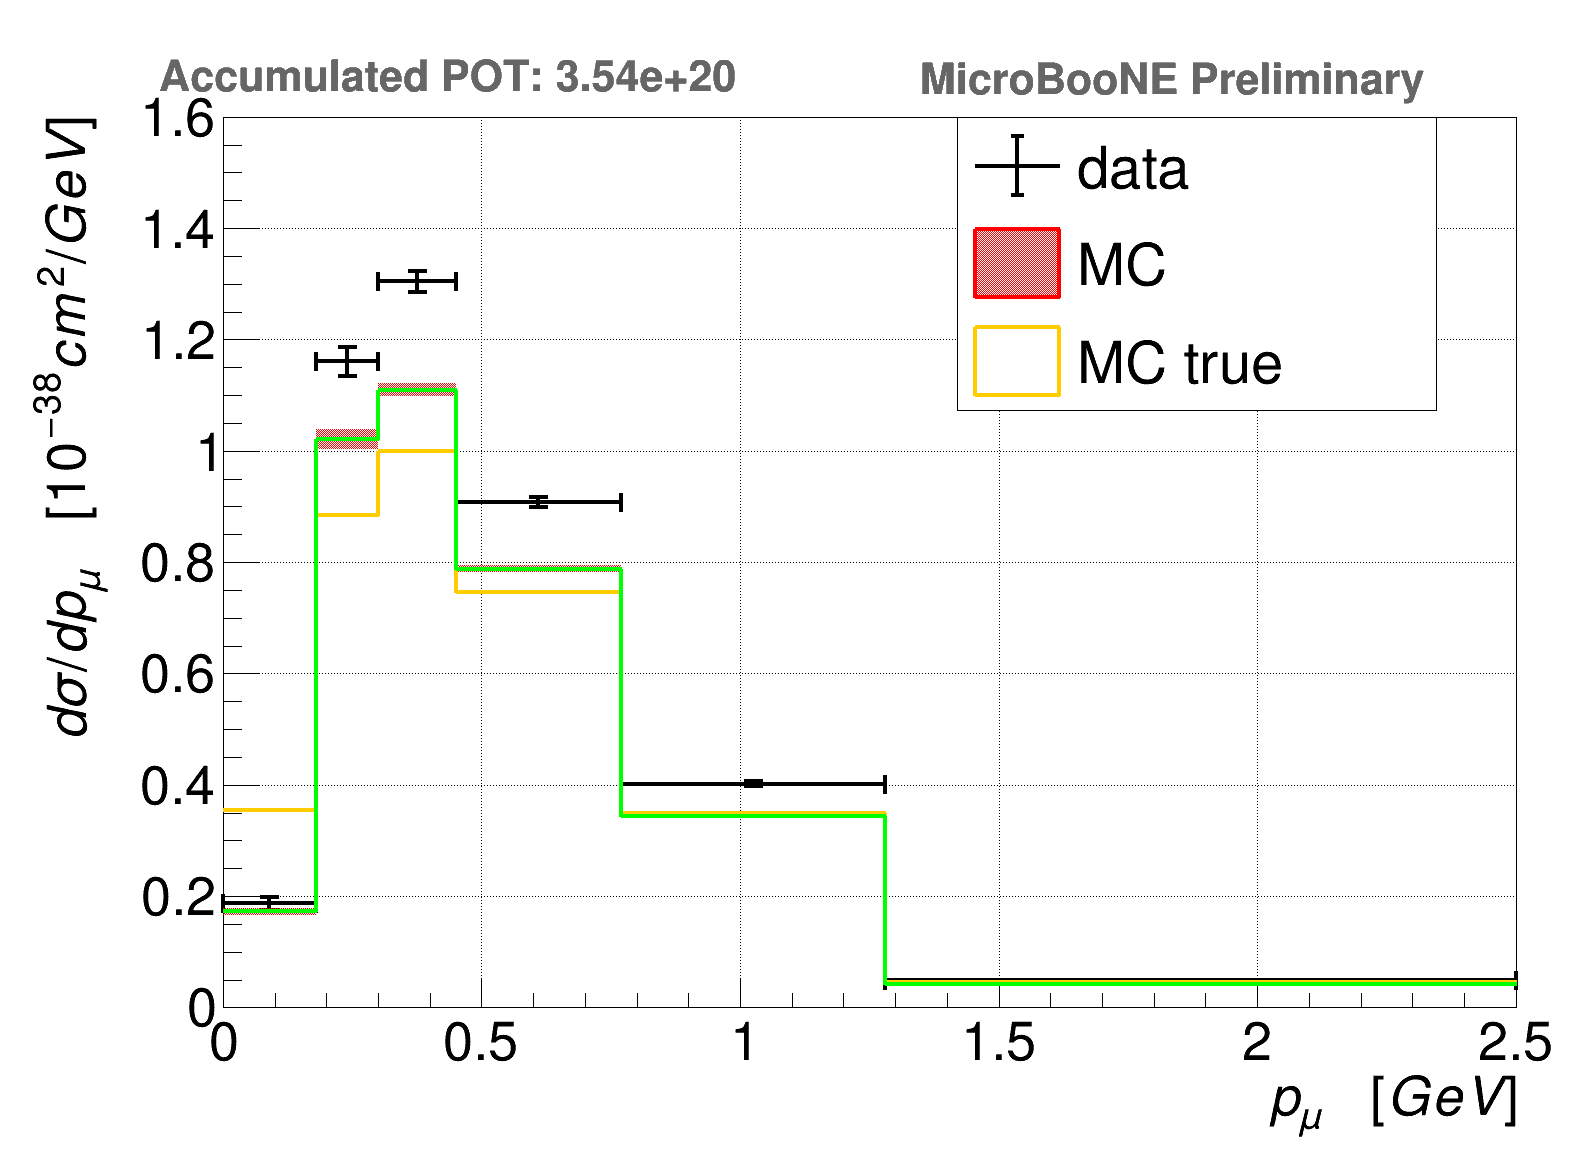

In [53]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
legend.AddEntry(h_true,'MC true',"f");
h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

422

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_xsec_corr_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_xsec_corr_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_xsec_corr_ratio.pdf has been created


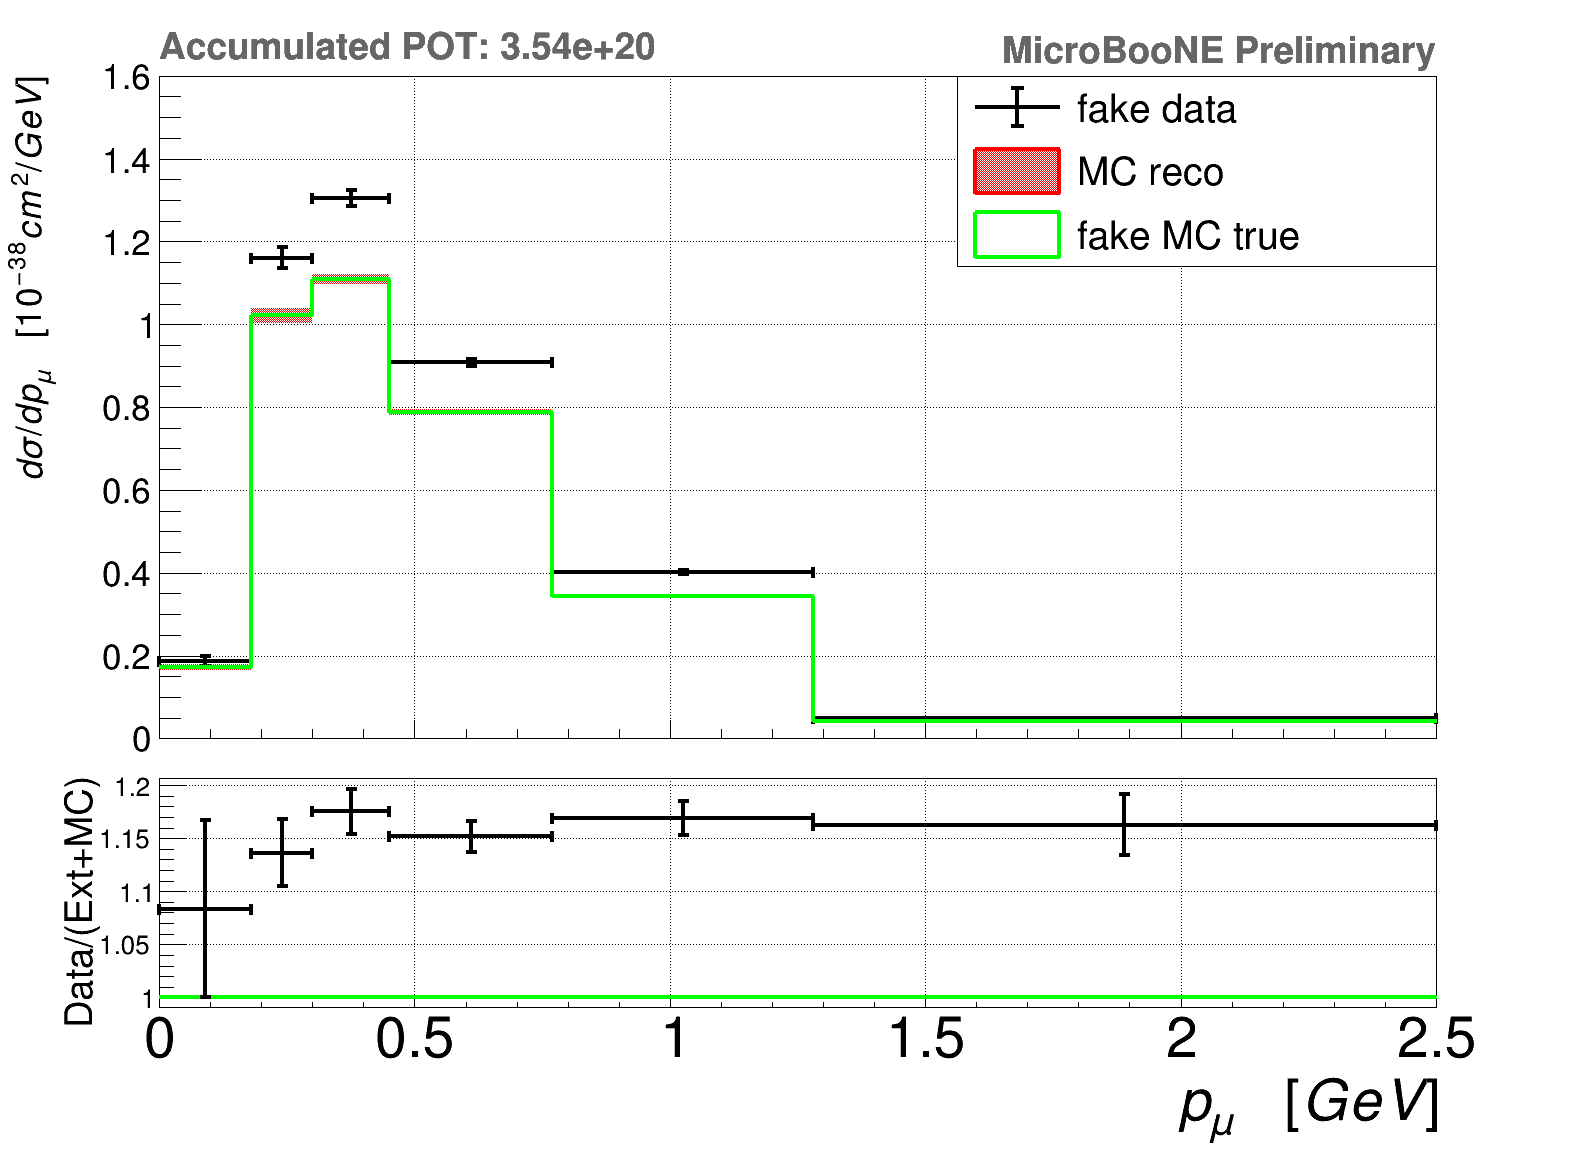

In [54]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
c1.SetTopMargin(0.2)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'fake data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
#legend.AddEntry(h_true,'fake MC true',"f");
legend.AddEntry(h_true_smeare,'fake MC true',"f");

h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
#h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding_ratio()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_overlay_sig)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_overlay_sig)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_overlay_sig)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_overlay_sig)

#h_overlay_data_ratio.SetMinimum(h_overlay_data_ratio.GetMinimum())
#h_overlay_data_ratio.SetMaximum(h_overlay_data_ratio.GetMaximum())
h_overlay_data_ratio.SetMaximum(-1111)
h_overlay_data_ratio.SetMinimum(-1111)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_data_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_data_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_data_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_data_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_data_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_data_ratio.GetXaxis().SetTitleOffset(1)

h_overlay_data_ratio.Draw('E1')
#h_overlay_true_ratio.Draw('hist same')
h_overlay_sig_ratio.Draw('same hist')
h_overlay_true_smeare_ratio.Draw('same hist')
h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_ratio.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [55]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [56]:
#asdgweag

In [57]:
# close the root file with all the histos
RootFile.Close()

# Now in cos(theta)

In [58]:
RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");

In [59]:
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/theta_bins',mom_bins)


[0.27112433 0.2657364  0.31847733 0.41916201 0.49421766 0.56031829
 0.64432913 0.70067185 0.71936941]


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_trueTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_eff_trueTheta.pdf has been created


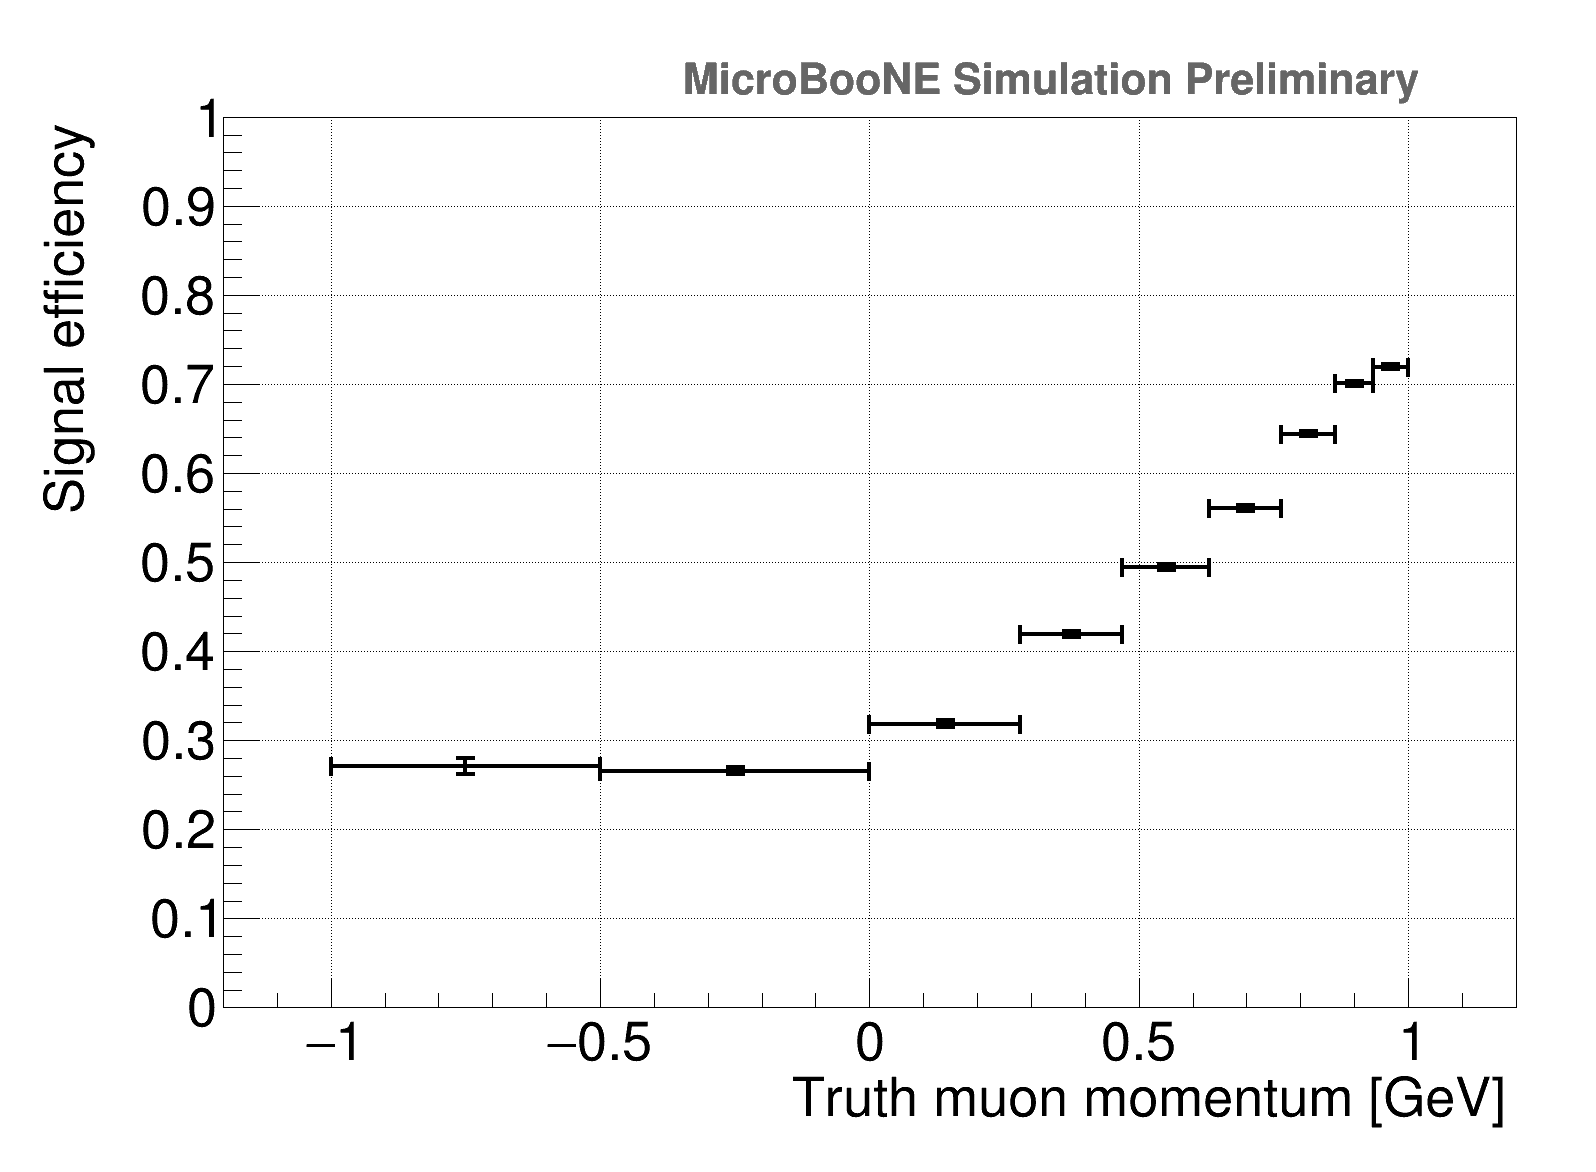

In [60]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueTheta.pdf")

eff.Write("h_eff_true")
true_eff_arr = np.zeros((binnum))
h_eff_tmp = h_init_eff_energy.Clone()
h_eff_tmp.Divide(h_init_eff_energy_1)
for i in range(1,binnum+1):
    true_eff_arr[i-1] = h_eff_tmp.GetBinContent(i)
print true_eff_arr
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/true_efficiency_theta',true_eff_arr)

136820

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_costheta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_costheta.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_costheta.pdf has been created


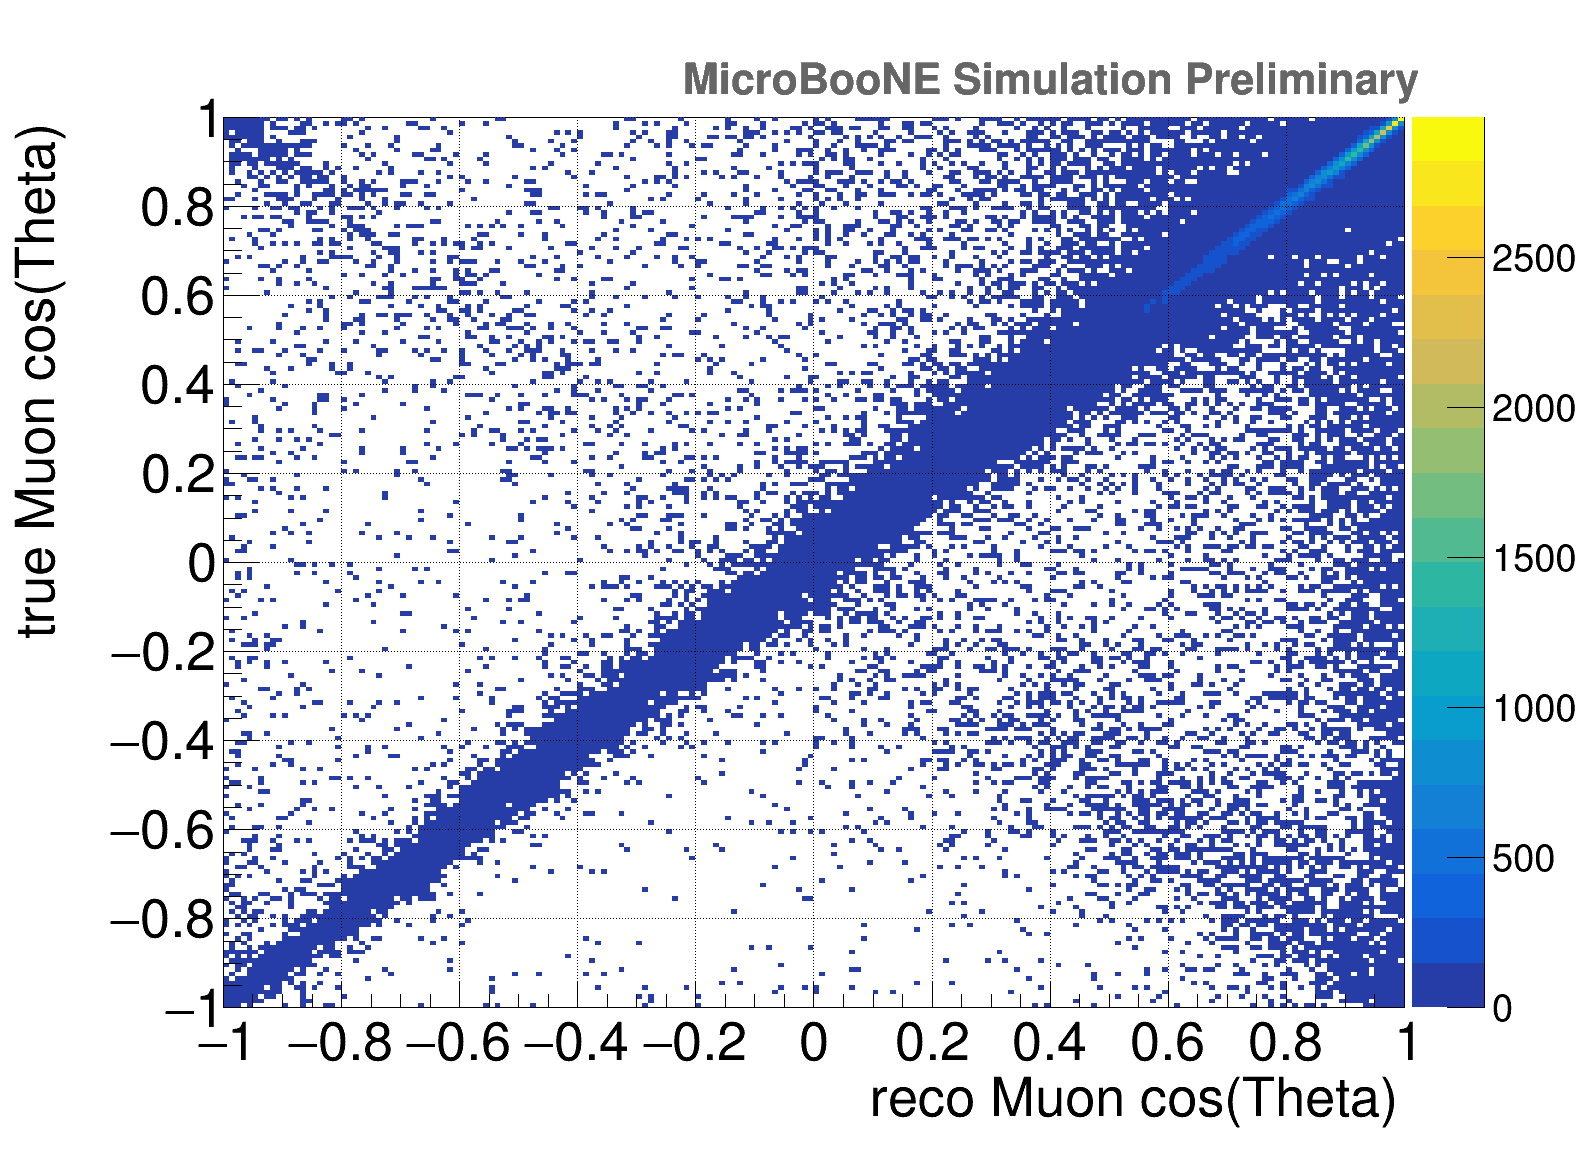

In [61]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon cos(Theta)")
h_migration.SetYTitle("true Muon cos(Theta)")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_costheta.root")
c1.SaveAs(globale.outputdir_png + "h2_true_costheta.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_costheta.pdf")

h_migration.Write("h2_true_theta_fine")

1648

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_Theta_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_Theta_bin.pdf has been created


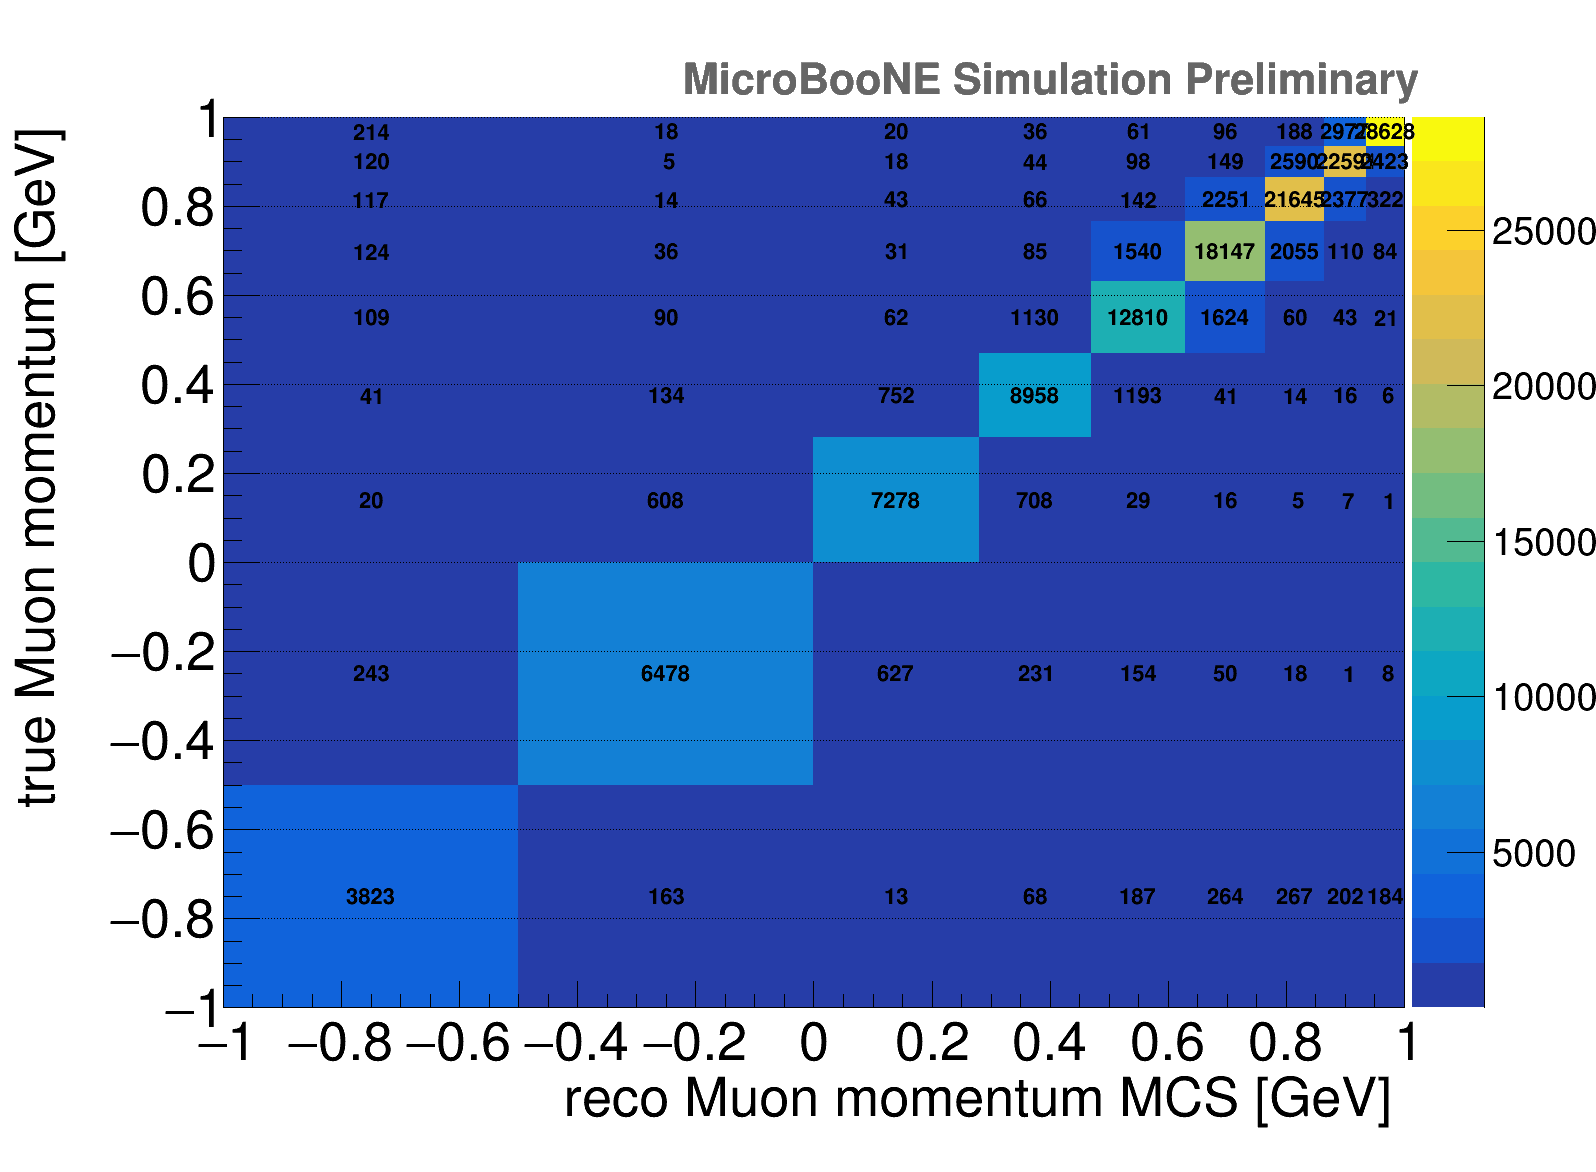

In [62]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat("2.0f");
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.SetGrid(0)
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_Theta_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_Theta_bin.pdf")

h_migration.Write("h2_true_theta_bin")

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
9.0
[0.80405934 0.95160889 0.99758852 1.00738865 1.04929155 1.07346277
 1.05259302 1.03526913 1.02873811]


853

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_mitigation_matrix_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_mitigation_matrix_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_mitigation_matrix_theta.pdf has been created


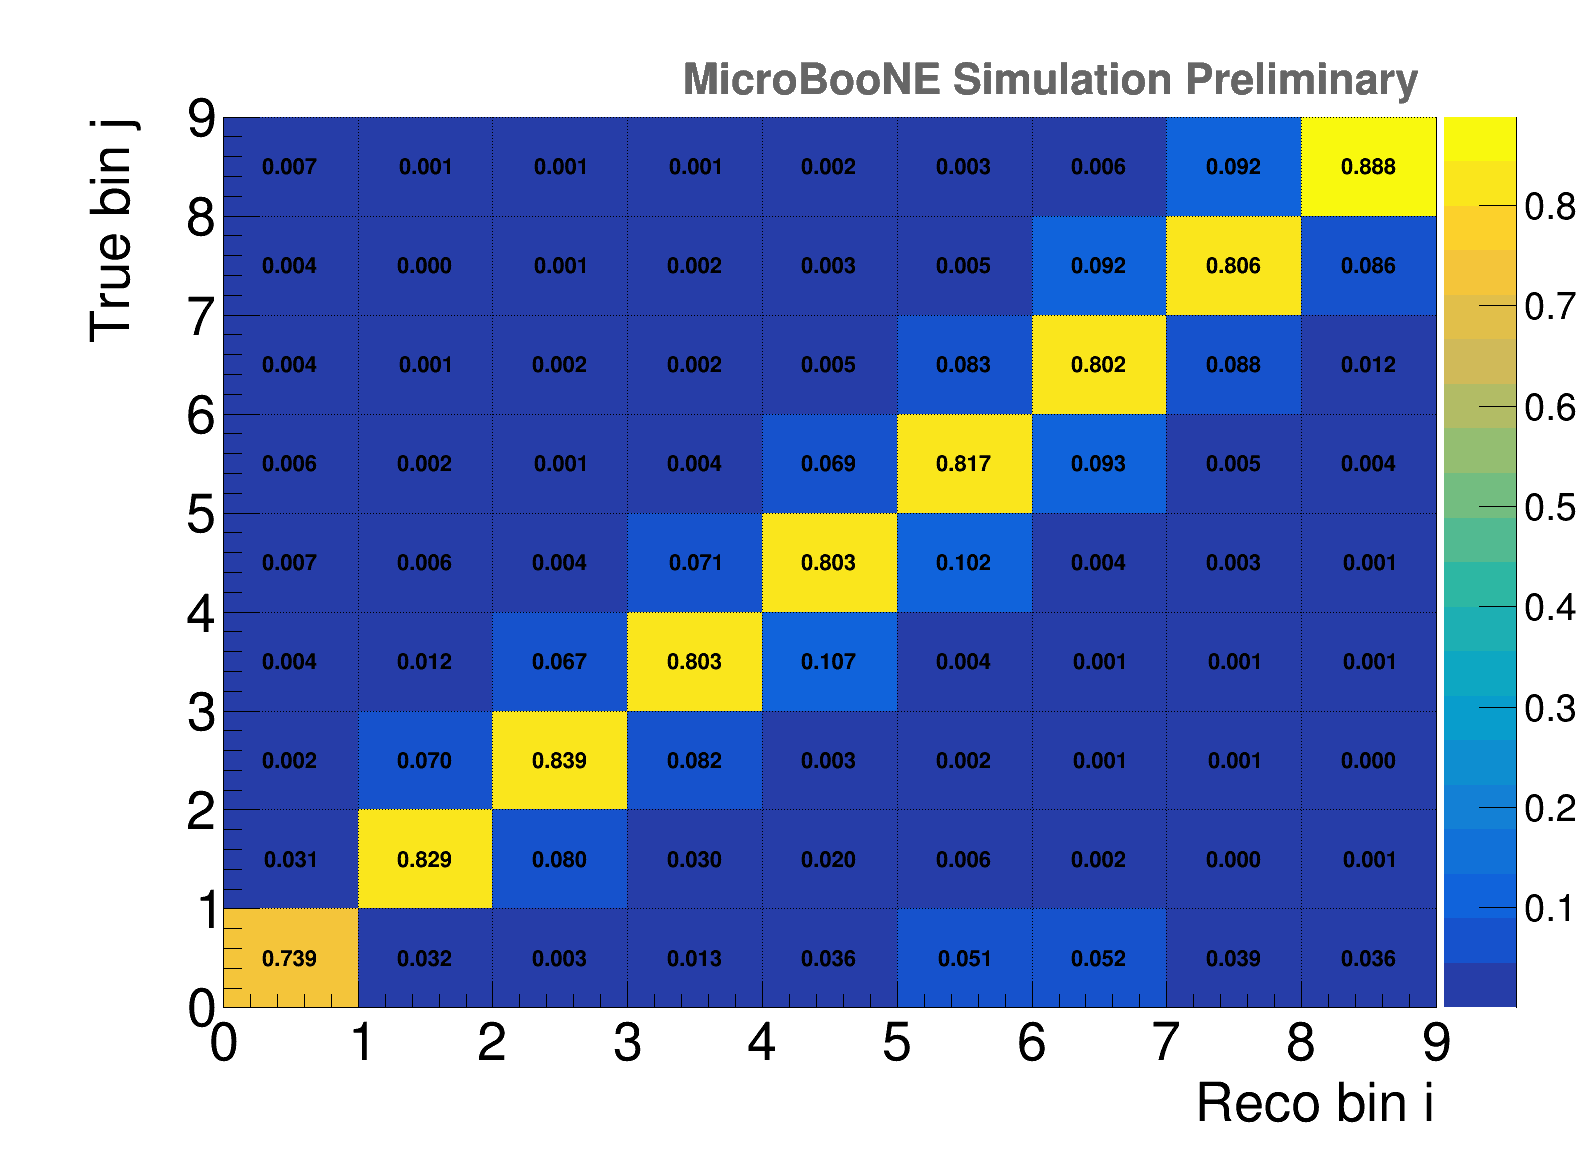

In [63]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ROOT.gStyle.SetPaintTextFormat("2.3f");
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix.sum(axis=0)
print mitigation_matrix.sum(axis=1).sum()
print mitigation_matrix.sum(axis=1)
#mitigation_matrix = mitigation_matrix.transpose()
#print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/migration_matrix_theta',mitigation_matrix)

h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.SetGrid(1)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix_theta.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix_theta.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix_theta")

In [64]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

533

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [65]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
#eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(outputdir+'eff_tilde_theta_xsec_CV',eff_tilde)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/eff_tilde_theta',eff_tilde)


5171.560546875 19074.498046875 0.27112433229781707
7810.0419921875 29390.185546875 0.2657363962446275
8672.052734375 27229.732421875 0.3184773394030236
11154.35546875 26611.083984375 0.4191620106606483
15949.6298828125 32272.48046875 0.49421766319625793
22212.142578125 39642.0078125 0.560318303835282
26978.494140625 41870.671875 0.6443291433480252
28038.0390625 40015.93359375 0.7006718710388704
32237.515625 44813.57421875 0.7193694363149419
[0.29570589 0.27431828 0.32329341 0.41383612 0.48662845 0.55455627
 0.63244634 0.68811124 0.70909774]


In [66]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

510

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_tilde_xsecTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_eff_tilde_xsecTheta.pdf has been created


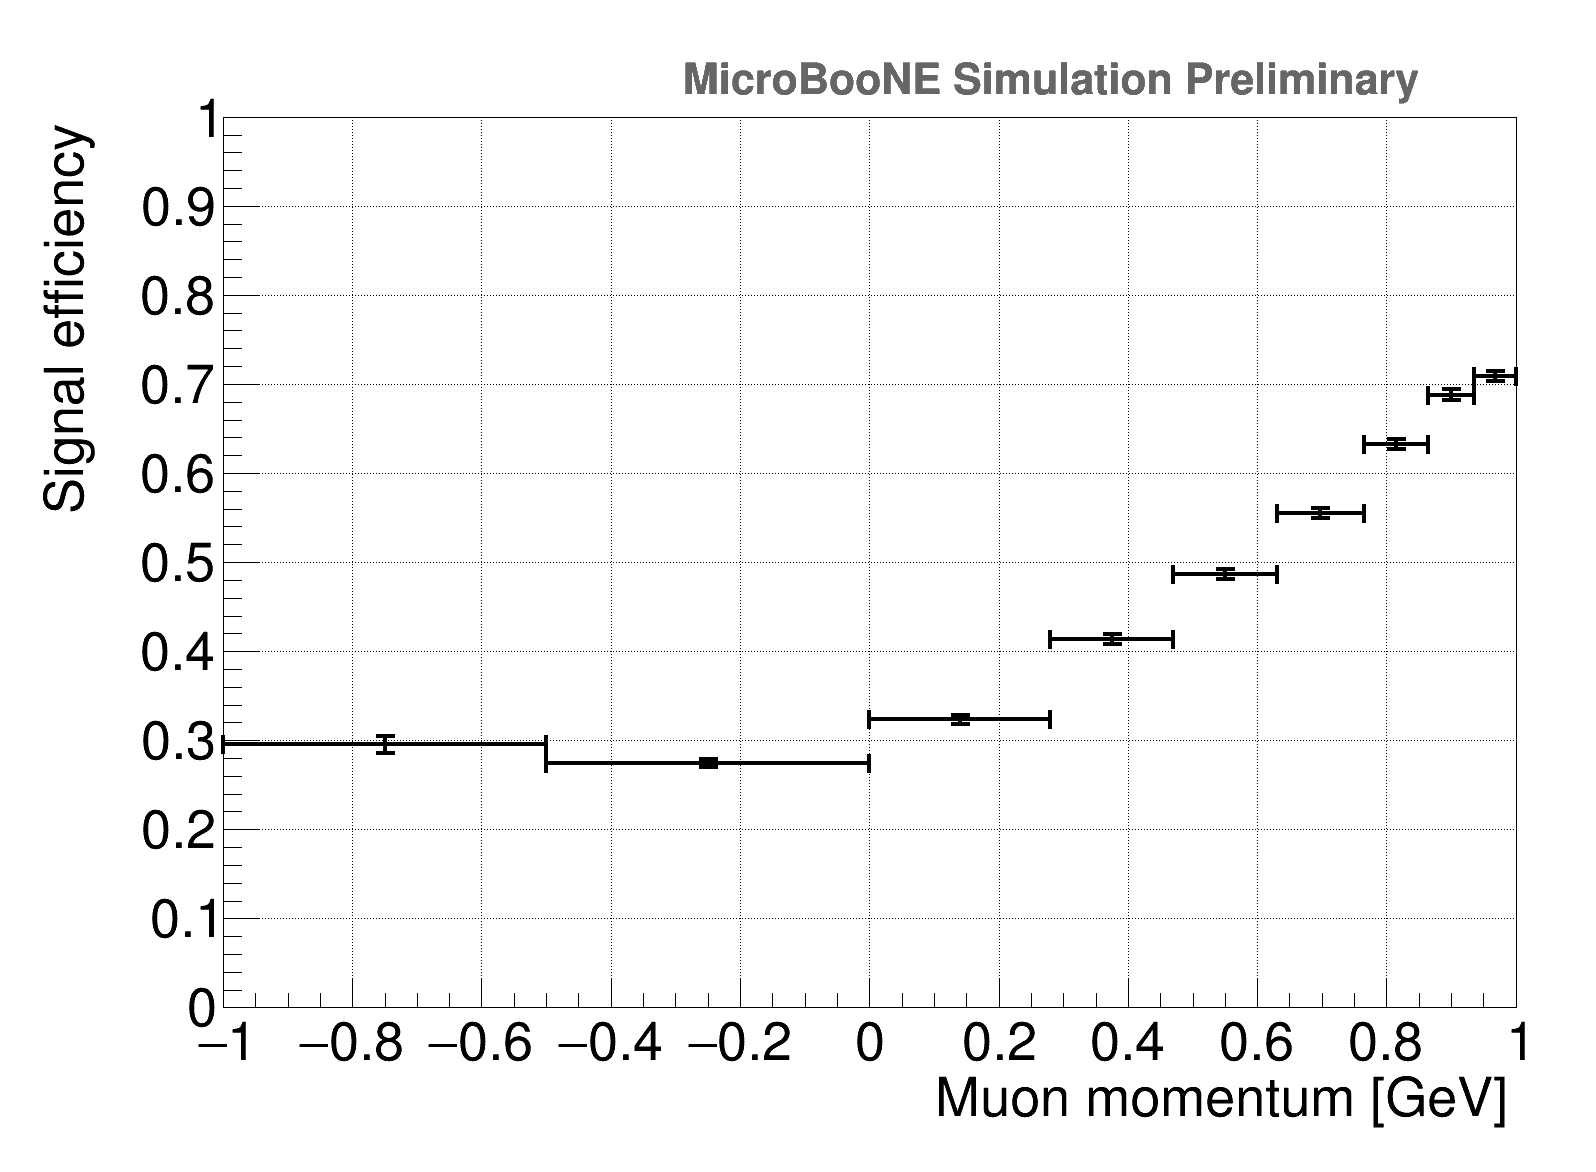

In [67]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecTheta.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [68]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
#h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))

#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
#globale.ext_out.Draw(variable+'>>h_ext',cut,'')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true)','')

246811L

In [69]:
#lat = np.zeros(8,binnum)
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    n_da = h_data.GetBinContent(i)
    err_da = math.sqrt(n_da)
    #n_ext = h_ext.GetBinContent(i)
    #err_ext = math.sqrt(n_ext)
    #n_dirt = h_dirt.GetBinContent(i)
    #err_dirt = math.sqrt(n_dirt)
    n_ov = h_overlay.GetBinContent(i)
    err_ov = math.sqrt(n_ov)
    n_sig = h_signal.GetBinContent(i)
    err_sig = math.sqrt(n_sig)
    #print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
    #' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
    #print ''
    print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    
    
    
    #print 'data: {0:0.2f}'.format(n_da*scale[data]), ' +- {0:0.2f}'.format(err_da*scale[data])
    #print ' Ext: {0:0.2f}'.format(n_ext*scale[ext]),' +- {0:0.2f}'.format(err_ext*scale[ext])
    #print' Dirt: {0:0.2f}'.format(n_dirt*scale[dirt]),' +- {0:0.2f}'.format(err_dirt*scale[dirt])
    #print ' Overlay: {0:0.2f}'.format(n_ov*scale[overlay]),' +- {0:0.2f}'.format(err_ov*scale[overlay])
    #print ' Signal: {0:0.2f}'.format(n_sig*scale[overlay]),' +- {0:0.2f}'.format(err_sig*scale[overlay])
    #print 'Total back ground: {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #print 'Total data - background: {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' +- {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #lat[i-1][0]=i
print ''
 

print 'For total cross section'
n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
#n_ext = h_ext.Integral(0,binnum+1)
#err_ext = math.sqrt(n_ext)
#n_dirt = h_dirt.Integral(0,binnum+1)
#err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)

n_true = h_true.Integral(0,binnum+1)
err_true = math.sqrt(n_true)

data_u = ufloat(n_da, err_da)*scale[data]
#ext_u = ufloat(n_ext, err_ext)*scale[ext]
#dirt_u = ufloat(n_dirt, err_dirt)*scale[dirt]
overlay_u = ufloat(n_ov, err_ov)*scale[overlay]
sig_u = ufloat(n_sig, err_sig)*scale[overlay]
true_u = ufloat(n_true, err_true)*scale[overlay]
eff_u = sig_u/true_u

xsec = (data_u - (overlay_u))/(eff_u*beam_flux*N_tot)# 

print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))



1  & 3356.00  $\pm$ 57.93  & 1408.22  $\pm$ 20.61  & 1451.30  $\pm$ 20.92 2  & 3636.00  $\pm$ 60.30  & 809.72  $\pm$ 15.63  & 2276.51  $\pm$ 26.21 3  & 4158.00  $\pm$ 64.48  & 828.28  $\pm$ 15.81  & 2667.91  $\pm$ 28.37 4  & 4966.00  $\pm$ 70.47  & 828.24  $\pm$ 15.81  & 3417.34  $\pm$ 32.11 5  & 6837.00  $\pm$ 82.69  & 989.23  $\pm$ 17.28  & 4891.60  $\pm$ 38.42 6  & 9115.00  $\pm$ 95.47  & 1105.14  $\pm$ 18.26  & 6829.56  $\pm$ 45.39 7  & 10381.00  $\pm$ 101.89  & 1160.54  $\pm$ 18.71  & 8098.16  $\pm$ 49.43 8  & 10703.00  $\pm$ 103.46  & 1167.35  $\pm$ 18.77  & 8545.29  $\pm$ 50.77 9  & 11946.00  $\pm$ 109.30  & 1472.41  $\pm$ 21.08  & 9557.75  $\pm$ 53.70 
For total cross section
9  & 65098.00  $\pm$ 255.14  & 9769.13  $\pm$ 54.29  & 47735.41  $\pm$ 120.01


In [70]:
h_data.Sumw2()
#h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
#h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
#h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

473

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [71]:
data_points = np.zeros((binnum))
mc_bkg_points = np.zeros((binnum))
for i in range(1,binnum+1):
    data_points[i-1] = h_data.GetBinContent(i)
    mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    #mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
print data_points
print mc_bkg_points
#print mc_signal_points
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points_theta',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_bkg_points_theta',mc_bkg_points)

[ 3356.  3636.  4158.  4966.  6837.  9115. 10381. 10703. 11946.]
[1408.21813965  809.71911621  828.28070068  828.24407959  989.23406982
 1105.1361084  1160.54272461 1167.34777832 1472.41003418]


In [72]:
print h_overlay.GetSumOfWeights()
#h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

9769.13275146
55328.8668213


In [73]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)'+'>>h_true',weight_name+'*(numu_true)','')
h_true.Scale(globale.scale[globale.overlay])
h_true.SetLineColor(ROOT.kOrange)
h_true.SetLineWidth(4)

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


In [74]:
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum))
for i in range(1,binnum+1):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum))
true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

4907.918746962791
8298.789877948318
8252.300283683406
8257.717607026989
10052.02062467669
12315.35734989732
12804.497808448155
12418.46743316919
13477.47323693714


In [75]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_smeare.Scale(1.0/(N_tot*beam_flux*1e-38))

In [76]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    h_true_smeare.SetBinContent(i,h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i))
    h_true_smeare.SetBinError(i,h_true_smeare.GetBinError(i)/h_true_smeare.GetBinWidth(i))

    print h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i)

0.1732827425
0.293003439903
0.929088035102
2.01906736925
3.46586302219
5.96454715478
11.3021299119
22.3702061895
28.1565713206


In [77]:
check_wes = 0.0
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)
    check_wes = check_wes+h_data.GetBinContent(i)*h_data.GetBinWidth(i)
print check_wes
# 0.943597549453

0.1162808761 0.00528576422817
0.181881502271 0.00523206114608
0.32467636466 0.00832571995911
0.464494764805 0.0103047720978
0.662934303284 0.0123360265854
0.944373428822 0.0150147534536
1.28684604168 0.0185355083721
1.747397542 0.0247075157675
2.00573730469 0.0270686451761
0.943179836235


In [78]:
mc_signal_points = np.zeros((binnum))

for i in range(1,binnum+1):
    #data_points[i-1] = h_data.GetBinContent(i)
    #mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
#print data_points
#print mc_bkg_points
print mc_signal_points
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_signal_points_theta',mc_signal_points)

[0.08664134 0.14650173 0.26014477 0.38362208 0.55453813 0.80521375
 1.13021314 1.56591463 1.83035004]


In [79]:
'''legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
#h_data.SetMaximum(300)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted.pdf")

h_data.Write("h_data_theta_bkgsubtracted")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted")'''

'legend = ROOT.TLegend(0.6,0.65,0.9,0.9)\nh_overlay_sig.SetLineColor(2)\nlegend.AddEntry(h_data,\'data\',"lep");\nlegend.AddEntry(h_overlay_sig,\'MC\',"f");\nh_data.SetYTitle("Selected Events - background")\nh_data.SetXTitle("cos(\\Theta_{\\mu})")\nh_data.SetLineWidth(3)\n#h_data.SetMaximum(300)\n\nh_data.GetYaxis().SetTitleSize(0.05)\nh_data.GetYaxis().SetTitleOffset(0.0)\nh_data.GetYaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleSize(0.05)\nh_data.GetXaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleOffset(1)\nh_data.SetLineColor(ROOT.kBlack)\nh_data.SetLineWidth(4)\nROOT.gStyle.SetEndErrorSize(9)\nc1.SetRightMargin(0.05)\n\nh_data.Draw(\'E1\')\nh_overlay_sig.SetFillColor(0)\nh_overlay_sig.SetLineWidth(4)\n#h_overlay_sig.Draw(\'hist same\')\nh_overlay_sig.DrawCopy(\'Hist same\')\nh_overlay_sig.SetFillColor(2)\nh_overlay_sig.SetFillStyle(3001)\nh_overlay_sig.Draw(\'E2 same\')\nlegend.Draw()\nprelim, pot_tex = draw_adding()\nprelim.Draw()\npot_tex.Draw()\nc1.Draw()\nc1.SaveAs

In [80]:
'''for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)'''

'for i in range(1,binnum+1):\n    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))\n    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))\n    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))\n    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))\n    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))\n    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))\n    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)'

In [81]:
'''legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
#h_data.SetMaximum(6000)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted_binwidth.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted_binwidth.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_theta_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted_binwidth")'''

'legend = ROOT.TLegend(0.6,0.65,0.9,0.9)\nh_overlay_sig.SetLineColor(2)\nlegend.AddEntry(h_data,\'data\',"lep");\nlegend.AddEntry(h_overlay_sig,\'MC\',"f");\nh_data.SetYTitle("Selected Events - background")\nh_data.SetXTitle("cos(\\Theta_{\\mu})")\nh_data.SetLineWidth(3)\n#h_data.SetMaximum(6000)\n\nh_data.GetYaxis().SetTitleSize(0.05)\nh_data.GetYaxis().SetTitleOffset(0.0)\nh_data.GetYaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleSize(0.05)\nh_data.GetXaxis().SetLabelSize(0.05)\nh_data.GetXaxis().SetTitleOffset(1)\nh_data.SetLineColor(ROOT.kBlack)\nh_data.SetLineWidth(4)\nROOT.gStyle.SetEndErrorSize(9)\nc1.SetRightMargin(0.05)\n\nh_data.Draw(\'E1\')\nh_overlay_sig.SetFillColor(0)\nh_overlay_sig.SetLineWidth(4)\n#h_overlay_sig.Draw(\'hist same\')\nh_overlay_sig.DrawCopy(\'Hist same\')\nh_overlay_sig.SetFillColor(2)\nh_overlay_sig.SetFillStyle(3001)\nh_overlay_sig.Draw(\'E2 same\')\nh_true.Draw(\'hist same\')\n\nlegend.Draw()\nprelim, pot_tex = draw_adding()\nprelim.Draw()\npot_t

In [82]:
'''h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))'''

'h_data.Divide(h_eff_tilde)\nh_data.Scale(1.0/(N_tot*beam_flux*1e-38))'

In [83]:
'''h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))'''

'h_overlay_sig.Divide(h_eff_tilde)\nh_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))\n\nh_true.Scale(1.0/(N_tot*beam_flux*1e-38))'

In [84]:
'''h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum))
for i in range(1,binnum+1):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum))

true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)'''

'h_true_smeare = h_true.Clone()\ntrue_bins = np.zeros((binnum))\nfor i in range(1,binnum+1):\n    true_bins[i-1] = h_true.GetBinContent(i)\n    \ntrue_bins_smeared = np.zeros((binnum))\n\ntrue_bins_smeared = mitigation_matrix.dot(true_bins)\n\nfor i in range(1,binnum+1):\n    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])\n    print true_bins_smeared[i-1]\nh_true_smeare.SetLineColor(ROOT.kGreen)\nh_true_smeare.SetLineWidth(4)'

In [85]:
check_wes = 0.0
stat_err_theta = np.zeros((binnum))
frac_stat_err_theta = np.zeros((binnum))
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    #print h_data.GetBinContent(i),h_data.GetBinError(i),h_data.GetBinError(i)/h_data.GetBinContent(i)
    check_wes = check_wes+h_data.GetBinContent(i) *h_data.GetBinWidth(i)
    #print h_data.GetBinWidth(i)
    #print mom_bins[i]- mom_bins[i-1]
    stat_err_theta[i-1] = h_data.GetBinError(i)
    frac_stat_err_theta[i-1] = h_data.GetBinError(i)/h_data.GetBinContent(i)
print check_wes
print stat_err_theta
print frac_stat_err_theta
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_signal_points_theta',mc_signal_points)

0.943179836235
[0.00528576 0.00523206 0.00832572 0.01030477 0.01233603 0.01501475
 0.01853551 0.02470752 0.02706865]
[0.04545687 0.02876632 0.02564314 0.0221849  0.01860822 0.01589917
 0.01440383 0.01413961 0.01349561]


In [86]:
'''print pot_data
print flux
print flux/pot_data
print N_tot'''

'print pot_data\nprint flux\nprint flux/pot_data\nprint N_tot'

478

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_xsec_corr_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_xsec_corr_theta.pdf has been created


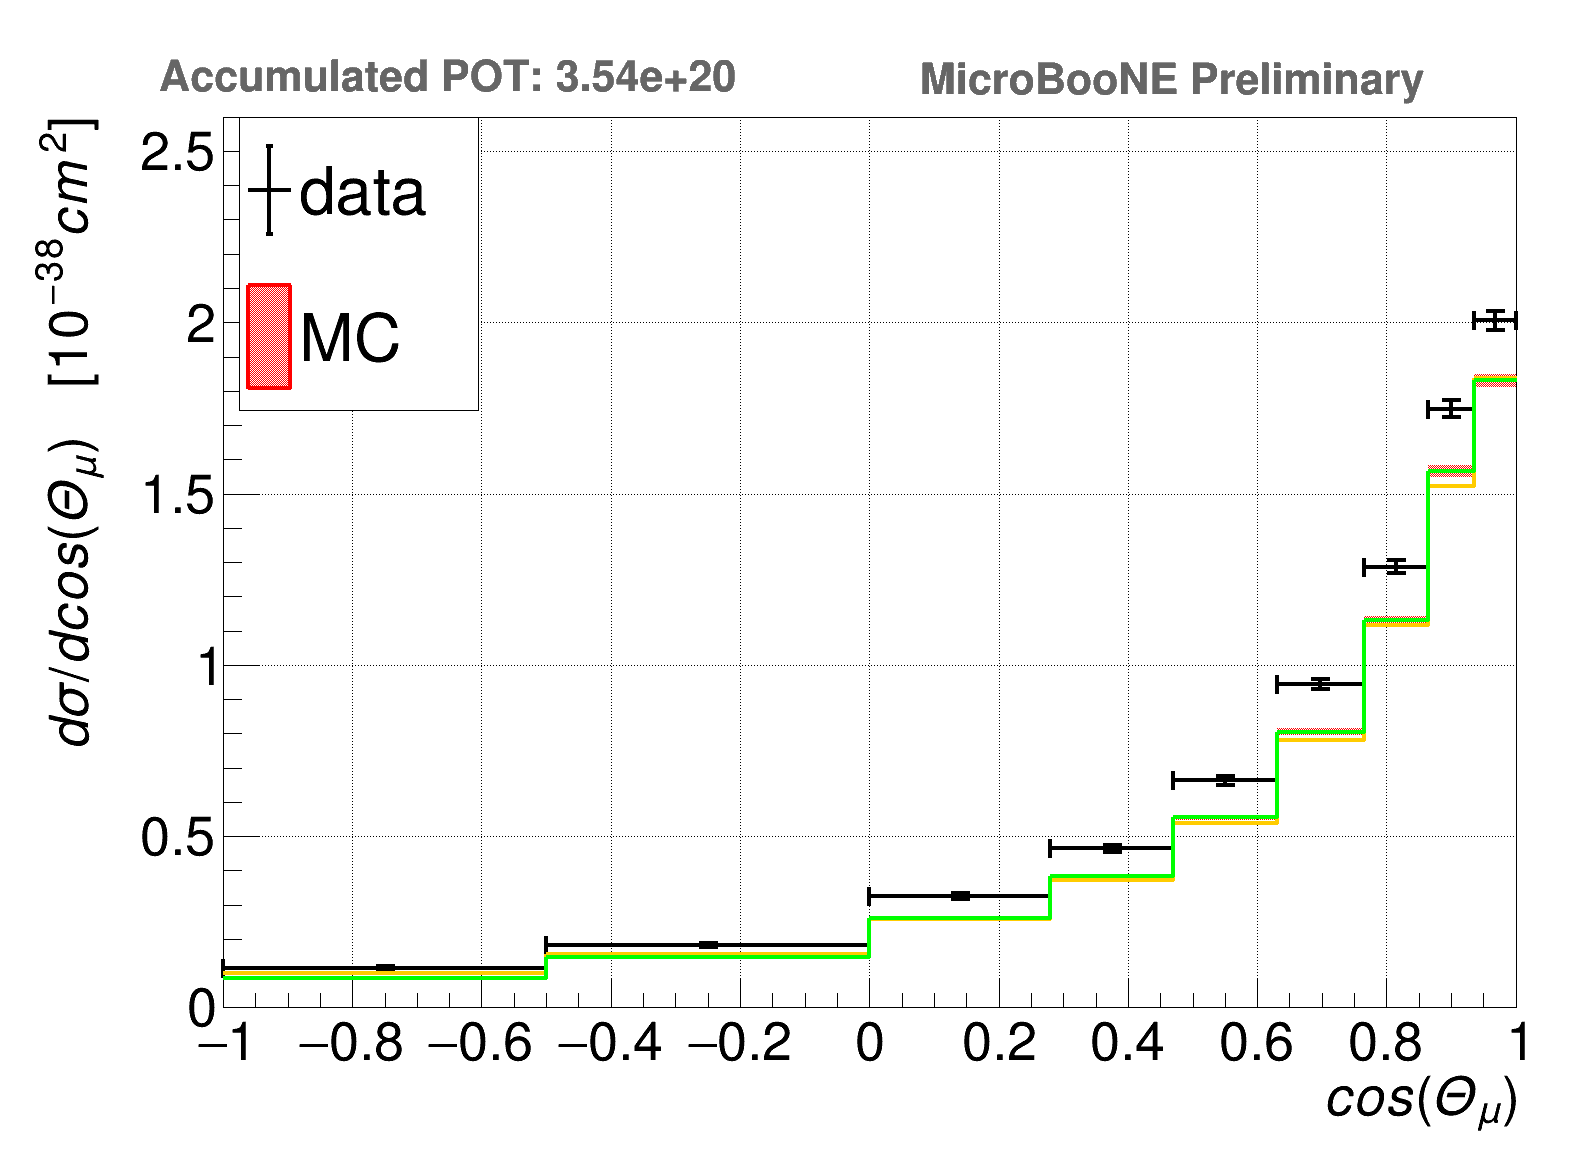

In [87]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetMaximum(2.6)
h_data.SetMinimum(0)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
h_true_smeare.Draw('hist same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta.pdf")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

472

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_xsec_corr_theta_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_xsec_corr_theta_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_xsec_corr_theta_ratio.pdf has been created


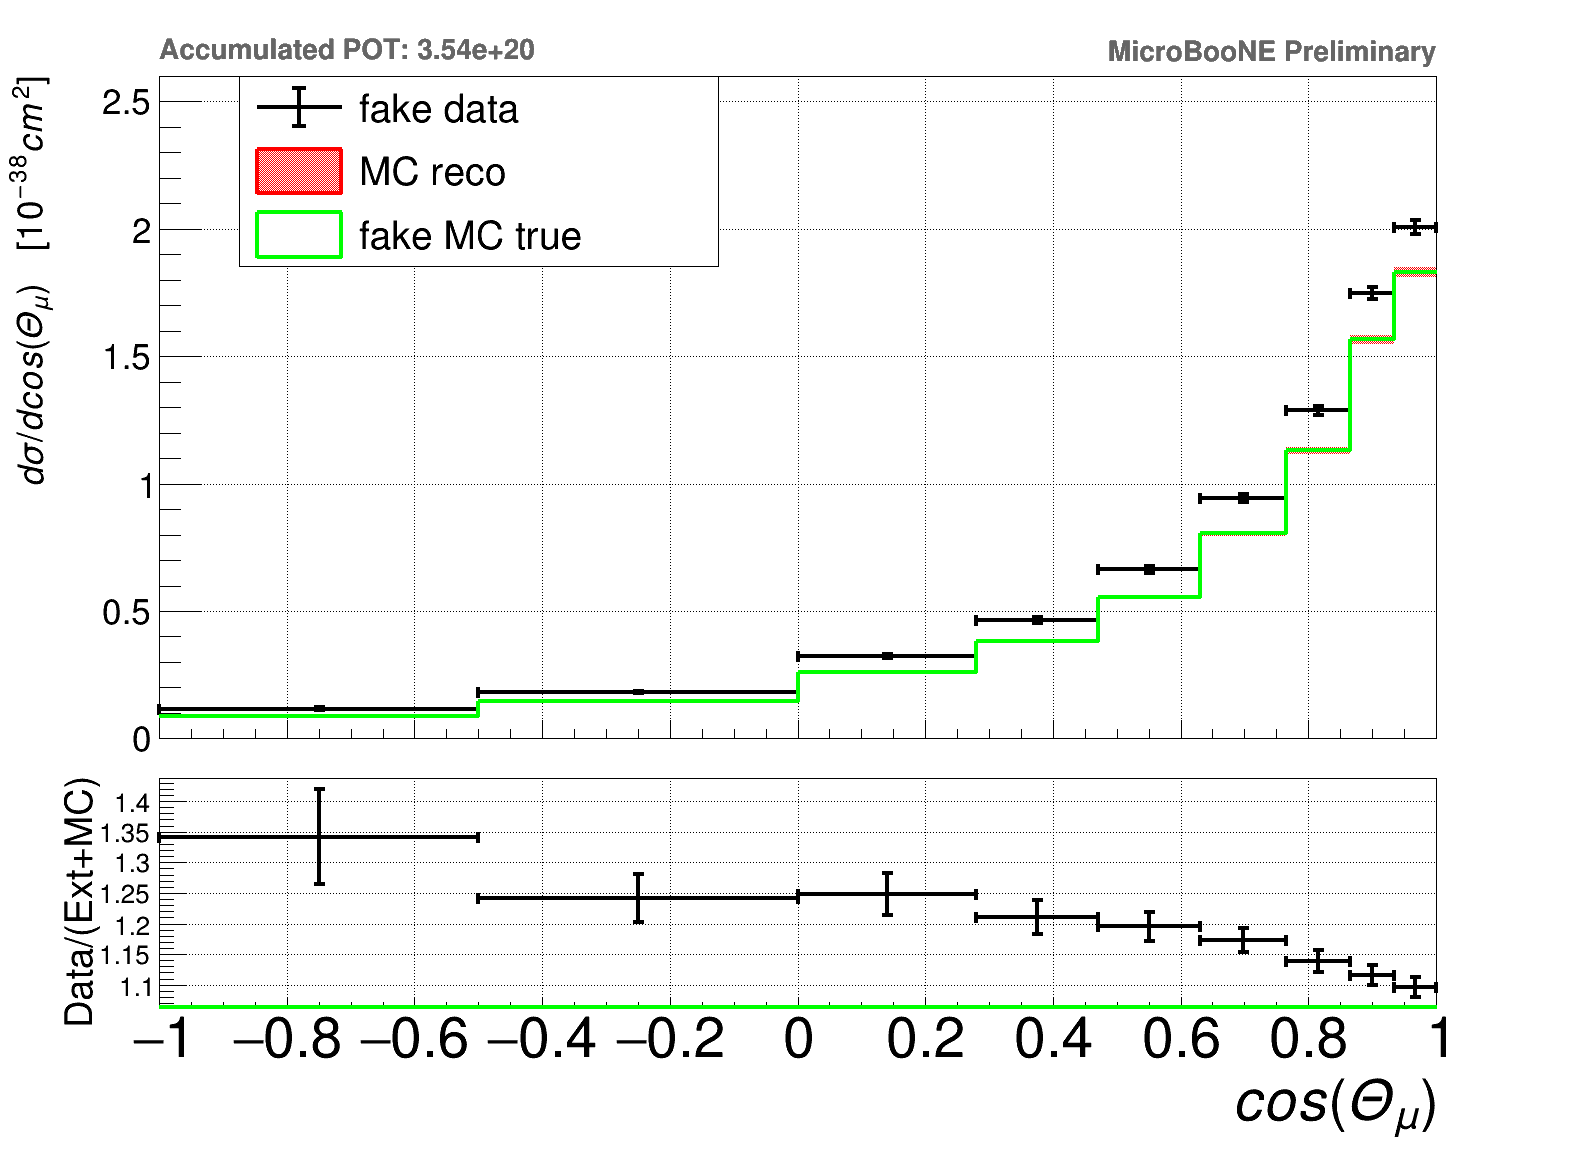

In [88]:
#legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend = ROOT.TLegend(0.15,0.65,0.45,0.9)

c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'fake data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
#legend.AddEntry(h_true,'fake MC true',"f");
legend.AddEntry(h_true_smeare,'fake MC true',"f");

h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
h_data.SetMaximum(2.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
#h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_true_smeare)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_true_smeare)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_true_smeare)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_true_smeare)

#h_overlay_data_ratio.SetMinimum(h_overlay_data_ratio.GetMinimum())
#h_overlay_data_ratio.SetMaximum(h_overlay_data_ratio.GetMaximum())
h_overlay_data_ratio.SetMaximum(-1111)
h_overlay_data_ratio.SetMinimum(-1111)
#h_overlay_data_ratio.SetMaximum(1.25)
#h_overlay_data_ratio.SetMinimum(0.9)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_data_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_data_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_data_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_data_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_data_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_data_ratio.GetXaxis().SetTitleOffset(1)

h_overlay_data_ratio.Draw('E1')
#h_overlay_true_ratio.Draw('hist same')
h_overlay_sig_ratio.Draw('same hist')
h_overlay_true_smeare_ratio.Draw('same hist')
h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_theta_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_theta_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_theta_ratio.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [89]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [90]:
#dfgsdg

In [91]:
# close the root file with all the histos
RootFile.Close()

In [92]:
# load the stuff for wes
path_wes = '/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/'

data_points_theta = np.load(path_wes+'data_points_theta.npy')
mc_bkg_points_theta = np.load(path_wes+'mc_bkg_points_theta.npy')
theta_bins = np.load(path_wes+'theta_bins.npy')
eff_tilde_theta = np.load(path_wes+'eff_tilde_theta.npy')
true_efficiency_theta = np.load(path_wes+'true_efficiency_theta.npy')
stat_err_arr = np.load(path_wes+'stat_err_arr.npy')
flux_err_arr = np.load(path_wes+'flux_err_arr.npy')
target_nucl_fd = 4.10331109202e+31
flux_fd = 3.54124623456e+20*7.3789785277e-10

print data_points_theta
#print mc_bkg_points_theta
#print theta_bins
#print eff_tilde_theta
print stat_err_arr
print flux_err_arr

IOError: [Errno 2] No such file or directory: '/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/stat_err_arr.npy'

In [ ]:
dxsec_dcth_fd = [ (data_points_theta[i]-mc_bkg_points_theta[i])/(theta_bins[i+1]-theta_bins[i])/(flux_fd*target_nucl_fd*eff_tilde_theta[i]) for i in range(len(data_points_theta))]


In [ ]:
xsec_tot_dcth_fd_check=0
for i in range(len(dxsec_dcth_fd)):
    xsec_tot_dcth_fd_check += dxsec_dcth_fd[i]*(theta_bins[i+1]-theta_bins[i])    
print xsec_tot_dcth_fd_check

In [ ]:
check_tilde=0
check_true = 0
for i in range(len(dxsec_dcth_fd)):
    check_tilde += eff_tilde_theta[i]*(theta_bins[i+1]-theta_bins[i])
    check_true += true_efficiency_theta[i]*(theta_bins[i+1]-theta_bins[i])
    
print check_tilde
print check_true

print xsec_tot_dcth_fd_check*check_true/check_tilde

In [ ]:
# load the stuff for wes
path_wes = '/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/google_folder/Data_for_Wes/'

data_points_theta = np.load(path_wes+'data_points_theta.npy')
mc_bkg_points_theta = np.load(path_wes+'mc_bkg_points_theta.npy')
theta_bins = np.load(path_wes+'theta_bins.npy')
eff_tilde_theta = np.load(path_wes+'eff_tilde_theta.npy')
true_efficiency_theta = np.load(path_wes+'true_efficiency_theta.npy')
stat_err_arr = np.load(path_wes+'stat_err_arr.npy')
target_nucl_fd = 4.10331109202e+31
flux_fd = 3.54124623456e+20*7.3789785277e-10

print data_points_theta
#print mc_bkg_points_theta
#print theta_bins
#print eff_tilde_theta
print stat_err_arr

In [ ]:
dxsec_dcth_fd = [ (data_points_theta[i]-mc_bkg_points_theta[i])/(theta_bins[i+1]-theta_bins[i])/(flux_fd*target_nucl_fd*eff_tilde_theta[i]) for i in range(len(data_points_theta))]
xsec_tot_dcth_fd_check=0
for i in range(len(dxsec_dcth_fd)):
    xsec_tot_dcth_fd_check += dxsec_dcth_fd[i]*(theta_bins[i+1]-theta_bins[i])    
print xsec_tot_dcth_fd_check

In [ ]:
xsec_tot_dcth_fd_check=0

for i in range(len(dxsec_dcth_fd)):
    xsec_tot_dcth_fd_check += dxsec_dcth_fd[i]*(theta_bins[i+1]-theta_bins[i]) 